IMPORTING LIBRARIES, SETTING THE DIFFERENTIAL EVOLUTION ALGORITHM AND LOADING THE DATA:

In [1]:
#Import libraries:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


                     0           1    ...         419         420
0                 DataBR  2020-02-26  ...  2021-04-19  2021-04-20
1  Casos novos por diaBR           1  ...       30624       69381

[2 rows x 421 columns]
              0                      1
0        DataBR  Casos novos por diaBR
1    2020-02-26                      1
2    2020-02-27                      0
3    2020-02-28                      0
4    2020-02-29                      1
..          ...                    ...
416  2021-04-16                  85774
417  2021-04-17                  67636
418  2021-04-18                  42980
419  2021-04-19                  30624
420  2021-04-20                  69381

[421 rows x 2 columns]
              0      1
1    2020-02-26      1
2    2020-02-27      0
3    2020-02-28      0
4    2020-02-29      1
5    2020-03-01      0
..          ...    ...
416  2021-04-16  85774
417  2021-04-17  67636
418  2021-04-18  42980
419  2021-04-19  30624
420  2021-04-20  69381

[420 rows

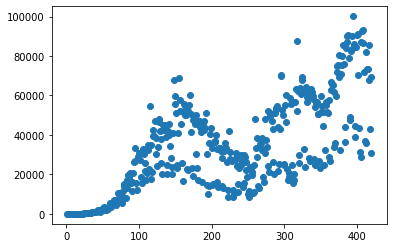

                      0           1    ...         419         420
0                  DataBR  2020-02-26  ...  2021-04-19  2021-04-20
1  Óbitos novos por diaBR           0  ...        1347        3321

[2 rows x 421 columns]
              0                       1
0        DataBR  Óbitos novos por diaBR
1    2020-02-26                       0
2    2020-02-27                       0
3    2020-02-28                       0
4    2020-02-29                       0
..          ...                     ...
416  2021-04-16                    3305
417  2021-04-17                    2929
418  2021-04-18                    1657
419  2021-04-19                    1347
420  2021-04-20                    3321

[421 rows x 2 columns]
              0     1
1    2020-02-26     0
2    2020-02-27     0
3    2020-02-28     0
4    2020-02-29     0
5    2020-03-01     0
..          ...   ...
416  2021-04-16  3305
417  2021-04-17  2929
418  2021-04-18  1657
419  2021-04-19  1347
420  2021-04-20  3321

[420 r

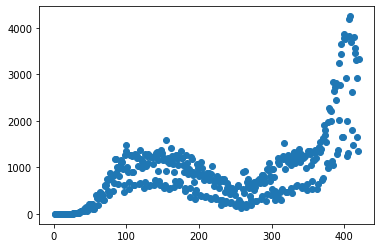

                          0      1      2      3   ...     50     51     52     53
0  Semana epidemiológica2018      1      2      3  ...     50     51     52   Null
1                  Casos2018    264    232    238  ...    452    334    259   Null
2  Semana epidemiológica2019      1      2      3  ...     50     51     52   Null
3                  Casos2019    316    289    274  ...    421    377    327   Null
4  Semana epidemiológica2020      1      2      3  ...     50     51     52     53
5                  Casos2020    533    516    509  ...  30100  28070  30025  33564
6  Semana epidemiológica2021      1      2      3  ...   Null   Null   Null   Null
7                  Casos2021  34526  33225  30420  ...   Null   Null   Null   Null

[8 rows x 54 columns]
                            0          1  ...                          6          7
0   Semana epidemiológica2018  Casos2018  ...  Semana epidemiológica2021  Casos2021
1                           1        264  ...                 

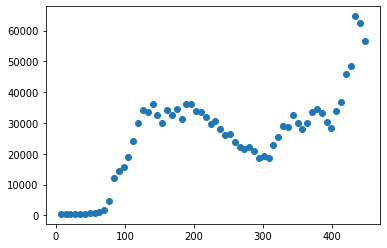

                          0     1     2     3   ...    50    51    52    53
0  Semana epidemiológica2018     1     2     3  ...    50    51    52  Null
1                 Óbitos2018    49    42    36  ...    35    34    29  Null
2  Semana epidemiológica2019     1     2     3  ...    50    51    52  Null
3                 Óbitos2019    44    41    45  ...    34    47    25  Null
4  Semana epidemiológica2020     1     2     3  ...    50    51    52    53
5                 Óbitos2020    77    83    83  ...  7401  6945  7525  8871
6  Semana epidemiológica2021     1     2     3  ...  Null  Null  Null  Null
7                 Óbitos2021  8995  8801  7685  ...  Null  Null  Null  Null

[8 rows x 54 columns]
                            0  ...           7
0   Semana epidemiológica2018  ...  Óbitos2021
1                           1  ...        8995
2                           2  ...        8801
3                           3  ...        7685
4                           4  ...        6795
5          

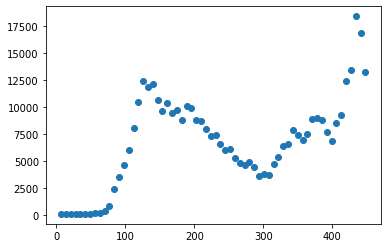

In [8]:
#Import the datasets and visualize them:

#New cases of covid19 per day
cases_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_third_wave/data_bigdata-covid19_21_04_2021/new_cases_brazil.csv', header=None)
print(cases_data)
cases_data = cases_data.transpose()
print(cases_data)
cases_data.drop([0], inplace=True)
print(cases_data)
cases_data.reset_index(inplace=True)
print(cases_data)
cases_data = cases_data.rename(columns={'index': 'dia_epidemiologico',
                                        0: 'data', 1: 'casos'})
print(cases_data)
cases_data['casos'] = pd.to_numeric(cases_data['casos'])
print(cases_data)

plt.scatter(cases_data['dia_epidemiologico'], cases_data['casos'])
plt.show()

#New deaths from covid19 per day
deaths_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_third_wave/data_bigdata-covid19_21_04_2021/new_deaths_brazil.csv', header=None)
print(deaths_data)
deaths_data = deaths_data.transpose()
print(deaths_data)
deaths_data.drop([0], inplace=True)
print(deaths_data)
deaths_data.reset_index(inplace=True)
print(deaths_data)
deaths_data = deaths_data.rename(columns={'index': 'dia_epidemiologico',
                                          0: 'data', 1: 'casos'})
print(deaths_data)
deaths_data['casos'] = pd.to_numeric(deaths_data['casos'])
print(deaths_data)

plt.scatter(deaths_data['dia_epidemiologico'], deaths_data['casos'])
plt.show()

#New cases of SRAG per day
srag_cases_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_third_wave/data_bigdata-covid19_21_04_2021/srag_cases_brazil.csv', header=None)
print(srag_cases_data)
srag_cases_data = srag_cases_data.transpose()
print(srag_cases_data)
for i in range(4): del srag_cases_data[i]
print(srag_cases_data)
srag_cases_data.drop([0], inplace=True)
print(srag_cases_data)
for i in range(14): srag_cases_data.iloc[i][6] = srag_cases_data.iloc[i][6]+53
print(srag_cases_data)
tmp_dataframe=pd.DataFrame()
tmp_dataframe[0]=srag_cases_data[6]
tmp_dataframe[1]=srag_cases_data[7]
print(tmp_dataframe)
del srag_cases_data[6]
del srag_cases_data[7]
print(srag_cases_data)
srag_cases_data = srag_cases_data.rename(columns={4: 0, 5: 1})
srag_cases_data = pd.concat([srag_cases_data, tmp_dataframe])
print(srag_cases_data)
srag_cases_data.reset_index(inplace=True)
print(srag_cases_data)
del srag_cases_data['index']
print(srag_cases_data)
for i in reversed(range(len(srag_cases_data))):
    if srag_cases_data.iloc[i][0]=='Null':
        srag_cases_data.drop([i], inplace=True)
print(srag_cases_data)
original_size=len(srag_cases_data)
for i in reversed(range(len(srag_cases_data))):
    if i>original_size-4:
        srag_cases_data.drop([i], inplace=True)
print(srag_cases_data)
srag_cases_data = srag_cases_data.rename(columns={0: 'semana_epidemiologica', 1: 'casos'})
print(srag_cases_data)
#convertendo semanas para dias para facilitar mais pra frente:
srag_cases_data['semana_epidemiologica'] = srag_cases_data['semana_epidemiologica'].astype(int).multiply(7)
print(srag_cases_data)
#corrigindo tipo dos dados:
srag_cases_data['casos'] = srag_cases_data['casos'].astype(float)


plt.scatter(srag_cases_data['semana_epidemiologica'], srag_cases_data['casos'])
plt.show()

#New deaths from SRAG per day
srag_deaths_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_third_wave/data_bigdata-covid19_21_04_2021/srag_deaths_brazil.csv', header=None)
print(srag_deaths_data)
srag_deaths_data = srag_deaths_data.transpose()
print(srag_deaths_data)
for i in range(4): del srag_deaths_data[i]
print(srag_deaths_data)
srag_deaths_data.drop([0], inplace=True)
print(srag_deaths_data)
for i in range(14): srag_deaths_data.iloc[i][6] = srag_deaths_data.iloc[i][6]+53
print(srag_deaths_data)
tmp_dataframe=pd.DataFrame()
tmp_dataframe[0]=srag_deaths_data[6]
tmp_dataframe[1]=srag_deaths_data[7]
print(tmp_dataframe)
del srag_deaths_data[6]
del srag_deaths_data[7]
print(srag_deaths_data)
srag_deaths_data = srag_deaths_data.rename(columns={4: 0, 5: 1})
srag_deaths_data = pd.concat([srag_deaths_data, tmp_dataframe])
print(srag_deaths_data)
srag_deaths_data.reset_index(inplace=True)
print(srag_deaths_data)
del srag_deaths_data['index']
print(srag_deaths_data)
for i in reversed(range(len(srag_deaths_data))):
    if srag_deaths_data.iloc[i][0]=='Null':
        srag_deaths_data.drop([i], inplace=True)
print(srag_deaths_data)
original_size=len(srag_deaths_data)
for i in reversed(range(len(srag_deaths_data))):
    if i>original_size-4:
        srag_deaths_data.drop([i], inplace=True)
print(srag_deaths_data)
srag_deaths_data = srag_deaths_data.rename(columns={0: 'semana_epidemiologica', 1: 'casos'})
print(srag_deaths_data)
#convertendo semanas para dias para facilitar mais pra frente:
srag_deaths_data['semana_epidemiologica'] = srag_deaths_data['semana_epidemiologica'].astype(int).multiply(7)
print(srag_deaths_data)
#corrigindo tipo dos dados:
srag_deaths_data['casos'] = srag_deaths_data['casos'].astype(float)

plt.scatter(srag_deaths_data['semana_epidemiologica'], srag_deaths_data['casos'])
plt.show()


In [9]:
#Defining our models and other useful functions:

def ensure_bounds(vec, bounds):
    vec_new = [] 
    for i in range(len(vec)):
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
    return vec_new

def grafico(x, y, yfit):
    plt.plot(x, y, '+')
    plt.plot(x, yfit)
    plt.show()
    #plt.pause(0.1)
    plt.clf()

def rsme(x_dados, y_dados, w):
    if objective_function_name == 'dist_maxwell_boltzmann': y_pred = dist_maxwell_boltzmann(x_dados, w)
    elif objective_function_name == 'single_maxwell_boltzmann': y_pred = single_maxwell_boltzmann(x_dados, w)
    elif objective_function_name == 'single_gaussian': y_pred = single_gaussian(x_dados, w)
    elif objective_function_name == 'double_gaussian': y_pred = double_gaussian(x_dados, w)
    elif objective_function_name == 'triple_gaussian': y_pred = triple_gaussian(x_dados, w)
    return np.sqrt(sum((y_dados-y_pred)**2)/len(y_dados))

def order_of_magnitude(x):
    return math.floor(math.log10(x))

def single_gaussian(x_dados, w):
    return w[0]*np.exp(-(x_dados-w[1])**2/(2*(w[2]**2)))

def double_gaussian(x_dados, w):
    return w[0]*np.exp(-((x_dados-w[1])**2)/(2*(w[2]**2)))+w[3]*np.exp(-((x_dados-w[4])**2)/(2*(w[5]**2)))

def triple_gaussian(x_dados, w):
    return w[0]*np.exp(-((x_dados-w[1])**2)/(2*(w[2]**2)))+w[3]*np.exp(-((x_dados-w[4])**2)/(2*(w[5]**2)))+w[6]*np.exp(-((x_dados-w[7])**2)/(2*(w[8]**2)))

def single_maxwell_boltzmann(data, w):
    
    tmp_list = []

    A1=w[0]
    B1=w[1]
    C1=w[2]
    D1=w[3]
      
    for i in range(len(data)):
        
        if C1*data[i]-B1 >= 0:
            tmp_1 = D1*4*np.pi*(np.sqrt(A1/np.pi)**3)*((C1*data[i]-B1)**2)/np.exp(A1*(C1*data[i]-B1)**2)
        else: 
            tmp_1 = 0.

        tmp_list.append(tmp_1)

    return tmp_list

def dist_maxwell_boltzmann(data, w):
    
    tmp_list = []

    A1=w[0]
    B1=w[1]
    C1=w[2]
    D1=w[3]

    A2=w[4]
    B2=w[5]
    C2=w[6]
    D2=w[7]
    
    A3=w[8]
    B3=w[9]
    C3=w[10]
    D3=w[11]

    for i in range(len(data)):
        
        if C1*data[i]-B1 >= 0:
            tmp_1 = D1*4*np.pi*(np.sqrt(A1/np.pi)**3)*((C1*data[i]-B1)**2)/np.exp(A1*(C1*data[i]-B1)**2)
        else: 
            tmp_1 = 0.

        if C2*data[i]-B2 >= 0:
            tmp_2 = D2*4*np.pi*(np.sqrt(A2/np.pi)**3)*((C2*data[i]-B2)**2)/np.exp(A2*(C2*data[i]-B2)**2)
        else: 
            tmp_2 = 0.

        if C3*data[i]-B3 >= 0:
            tmp_3 = D3*4*np.pi*(np.sqrt(A3/np.pi)**3)*((C3*data[i]-B3)**2)/np.exp(A3*(C3*data[i]-B3)**2)
        else: 
            tmp_3 = 0.

        tmp_list.append(tmp_1 + tmp_2 + tmp_3)

    return tmp_list

def objective_function(data, w):

    if objective_function_name == 'dist_maxwell_boltzmann': return dist_maxwell_boltzmann(data, w)
    elif objective_function_name == 'single_maxwell_boltzmann': return single_maxwell_boltzmann(data, w)
    elif objective_function_name == 'single_gaussian': return single_gaussian(data, w)
    elif objective_function_name == 'double_gaussian': return double_gaussian(data, w)
    elif objective_function_name == 'triple_gaussian': return triple_gaussian(data, w)

def bounds_actualizer(bounds, bound_parameter, gen_sol):
 
    for j in range(len(bounds)):
        if gen_sol[j] <= bounds[j][0]:
            print(bounds)
            bounds[j] = (bounds[j][0]-bound_parameter*10**order_of_magnitude(np.abs(bounds[j][0])),
                         bounds[j][1])
            print(bounds)

        if gen_sol[j] >= bounds[j][1]:
            print(bounds)
            bounds[j] = (bounds[j][0], 
                         bounds[j][1]+bound_parameter*10**order_of_magnitude(np.abs(bounds[j][1])))
            print(bounds)


In [10]:
#Differential Evolution algorithm:

def Differential_Evolution(cost_func, bounds, bound_parameter, popsize, mutate, 
                           recombination, maxiter, x_dados, y_dados, plot_interval):

    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
            
    for i in range(1, maxiter+1):
        #print ("Iteração:",i)
        gen_scores = []
        for j in range(0, popsize):

            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = random.sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]
            
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]
            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            v_trial = []
            for k in range(len(x_t)):
                crossover = random.random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])
                else:
                    v_trial.append(x_t[k])
                    
            score_trial  = cost_func(x_dados, y_dados, v_trial)
            score_target = cost_func(x_dados, y_dados, x_t)
            
            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                #print( '   >',score_trial, v_trial)
            else:
                #print( '   >',score_target, x_t)
                gen_scores.append(score_target)

        #gen_avg = sum(gen_scores) / popsize #média da geração
        #gen_best = min(gen_scores) #melhor da geração
        gen_sol = population[gen_scores.index(min(gen_scores))] #melhor resultado
        
        if (i%plot_interval==0):
            print('Iteração:', i)
            yfit = objective_function(x_dados, gen_sol)
            grafico(x_dados, y_dados, yfit)
            print(gen_sol)

        bounds_actualizer(bounds, bound_parameter, gen_sol)

    return gen_sol


NEW COVID-19 CASES ANALYSIS:

In [ ]:
#Fit the first wave with the new model:

cases_data_tmp = cases_data.copy()

for i in range(len(cases_data_tmp)): 
    if i > 240: cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(cases_data_tmp['dia_epidemiologico'])
y_dados = np.array(cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_gaussian'

bounds = [(1e-10,1e6), (1e-10,225), (1e-10,5000)]

popsize = 30               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 2000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the first wave with the new model:

cases_data_tmp = cases_data.copy()

for i in range(len(cases_data_tmp)): 
    if i < 250 or i > 355: cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(cases_data_tmp['dia_epidemiologico'])
y_dados = np.array(cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_gaussian'

bounds = [(1e-10,1e6), (225,370), (1e-10,5000)]

popsize = 30               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the first wave with the new model:

cases_data_tmp = cases_data.copy()

for i in range(len(cases_data_tmp)): 
    if i < 355: cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(cases_data_tmp['dia_epidemiologico'])
y_dados = np.array(cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_gaussian'

bounds = [(1e-10,1e6), (350,1000), (1e-10,5000)]

popsize = 30               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 5000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


[(37982.594321861456, 47982.594321861456), (112.19305882877572, 212.19305882877572), (49.45766023840195, 59.45766023840195), (44405.56084100777, 54405.56084100777), (276.0455530590382, 376.0455530590382), (52.46751324981304, 62.46751324981304), (68900.43032149377, 78900.43032149377), (343.3967848858834, 443.3967848858834), (31.710687707691427, 41.71068770769143)]
[(37982.594321861456, 47982.594321861456), (112.19305882877572, 212.19305882877572), (49.45766023840195, 59.45766023840195), (39405.56084100777, 54405.56084100777), (276.0455530590382, 376.0455530590382), (52.46751324981304, 62.46751324981304), (68900.43032149377, 78900.43032149377), (343.3967848858834, 443.3967848858834), (31.710687707691427, 41.71068770769143)]
[(37982.594321861456, 47982.594321861456), (112.19305882877572, 212.19305882877572), (49.45766023840195, 59.45766023840195), (39405.56084100777, 54405.56084100777), (276.0455530590382, 376.0455530590382), (52.46751324981304, 62.46751324981304), (68900.43032149377, 789

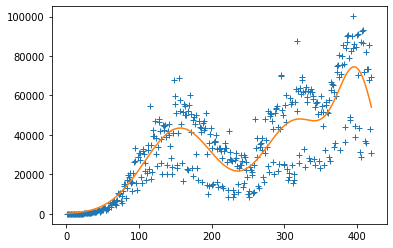

[43392.00562101256, 156.3600735833973, 49.000380773199794, 47285.21488770532, 317.62344779378384, 46.52846567419168, 64131.42382953985, 400.8859546033293, 26.993589408399693]
[(32982.594321861456, 47982.594321861456), (112.19305882877572, 212.19305882877572), (44.45766023840195, 59.45766023840195), (34405.56084100777, 54405.56084100777), (276.0455530590382, 376.0455530590382), (37.46751324981304, 62.46751324981304), (63900.43032149377, 78900.43032149377), (343.3967848858834, 493.3967848858834), (26.710687707691427, 46.71068770769143)]
[(32982.594321861456, 47982.594321861456), (112.19305882877572, 212.19305882877572), (44.45766023840195, 59.45766023840195), (34405.56084100777, 54405.56084100777), (276.0455530590382, 376.0455530590382), (37.46751324981304, 62.46751324981304), (63900.43032149377, 78900.43032149377), (343.3967848858834, 493.3967848858834), (21.710687707691427, 46.71068770769143)]
Iteração: 600


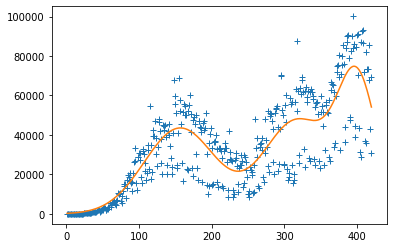

[43458.35054391141, 156.52840626564688, 49.07438392036724, 47413.17473028724, 317.8743114395237, 46.26938558365236, 64453.797271666874, 400.82508039838365, 26.92290255830879]
Iteração: 900


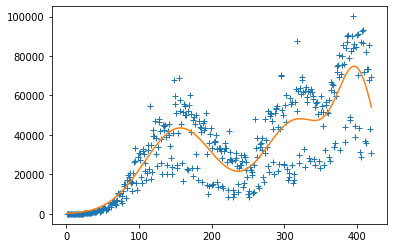

[43446.68255445655, 156.50334832819198, 49.04095913187457, 47428.403660193995, 317.9486493688524, 46.34689664094398, 64388.19087690842, 400.84985762617197, 26.86385377143127]
Iteração: 1200


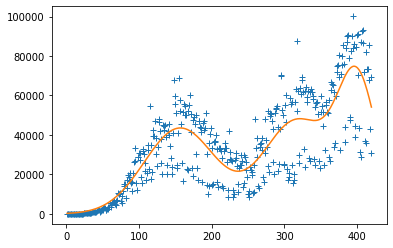

[43447.23521894215, 156.49640626257192, 49.02882465386227, 47420.93152620114, 317.9564490529615, 46.38065345070139, 64361.611420152185, 400.85620753580446, 26.86106434430367]
Iteração: 1500


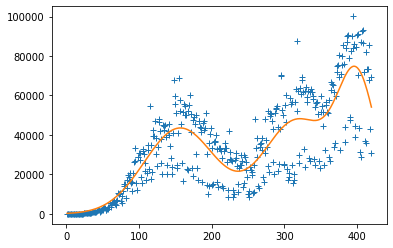

[43447.51886494882, 156.4959109454903, 49.026073577683704, 47421.392771665516, 317.9626105228282, 46.386900936757684, 64352.9007332677, 400.85793491452597, 26.860880270156155]
Iteração: 1800


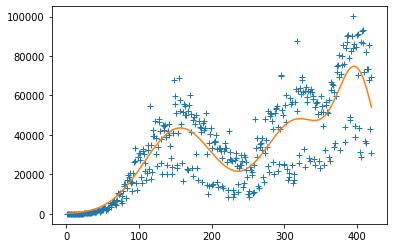

[43447.67042862428, 156.49544924736222, 49.0257008752195, 47421.17685793787, 317.96405752350006, 46.38838943299635, 64351.280807915464, 400.85867380949185, 26.86070210741959]
Iteração: 2100


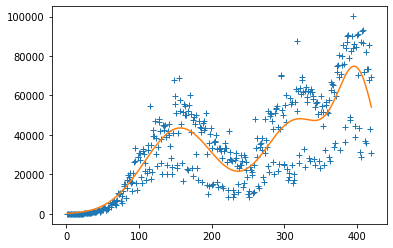

[43447.66677374834, 156.4953889917649, 49.02567279929704, 47421.183765560505, 317.9635375951905, 46.38801984595686, 64351.62521333888, 400.8584881963544, 26.860799488326933]
Iteração: 2400


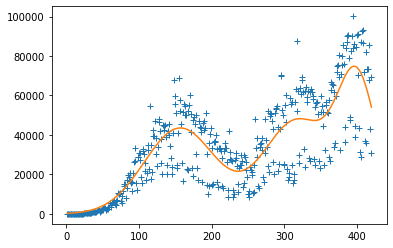

[43447.65487506139, 156.4953773157996, 49.025667226417916, 47421.21192318519, 317.9635763655577, 46.38803298817255, 64351.60965418788, 400.85851758530765, 26.86079193551688]
Iteração: 2700


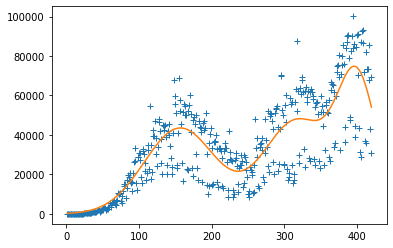

[43447.65128913538, 156.49536634796198, 49.025656970737614, 47421.208652731206, 317.96361851181916, 46.38809288206468, 64351.555367310386, 400.8585154953164, 26.860775604075222]
Iteração: 3000


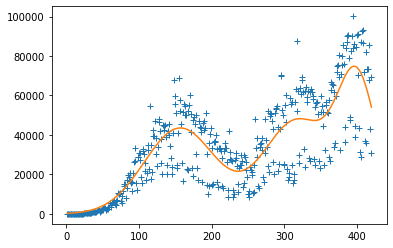

[43447.65525752633, 156.49536601075997, 49.02565213922403, 47421.207943019974, 317.9636097998259, 46.38808712307434, 64351.56335819904, 400.85851310750627, 26.860775602409262]
[43447.65525752633, 156.49536601075997, 49.02565213922403, 47421.207943019974, 317.9636097998259, 46.38808712307434, 64351.56335819904, 400.85851310750627, 26.860775602409262]


<Figure size 432x288 with 0 Axes>

In [21]:
#Old model:

x_dados = np.array(cases_data['dia_epidemiologico'])
y_dados = np.array(cases_data['casos'])

cost_func = rsme
objective_function_name = 'triple_gaussian'

wave_1 = [42982.594321861456, 162.19305882877572, 54.45766023840195]
wave_2 = [49405.56084100777, 326.0455530590382, 57.46751324981304]
wave_3 = [73900.43032149377, 393.3967848858834, 36.71068770769143]

popsize = 90               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

bounds = [(wave_1[0]-bound_parameter*10**order_of_magnitude(wave_1[0]),
           wave_1[0]+bound_parameter*10**order_of_magnitude(wave_1[0])),
          (wave_1[1]-bound_parameter*10**order_of_magnitude(wave_1[1]),
           wave_1[1]+bound_parameter*10**order_of_magnitude(wave_1[1])), 
          (wave_1[2]-bound_parameter*10**order_of_magnitude(wave_1[2]),
           wave_1[2]+bound_parameter*10**order_of_magnitude(wave_1[2])), 
          (wave_2[0]-bound_parameter*10**order_of_magnitude(wave_2[0]),
           wave_2[0]+bound_parameter*10**order_of_magnitude(wave_2[0])),
          (wave_2[1]-bound_parameter*10**order_of_magnitude(wave_2[1]),
           wave_2[1]+bound_parameter*10**order_of_magnitude(wave_2[1])), 
          (wave_2[2]-bound_parameter*10**order_of_magnitude(wave_2[2]),
           wave_2[2]+bound_parameter*10**order_of_magnitude(wave_2[2])), 
          (wave_3[0]-bound_parameter*10**order_of_magnitude(wave_3[0]),
           wave_3[0]+bound_parameter*10**order_of_magnitude(wave_3[0])),
          (wave_3[1]-bound_parameter*10**order_of_magnitude(wave_3[1]),
           wave_3[1]+bound_parameter*10**order_of_magnitude(wave_3[1])), 
          (wave_3[2]-bound_parameter*10**order_of_magnitude(wave_3[2]),
           wave_3[2]+bound_parameter*10**order_of_magnitude(wave_3[2]))]

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)
 

In [ ]:
#Fit the first wave with the new model:

cases_data_tmp = cases_data.copy()

for i in range(len(cases_data_tmp)): 
    if i > 240: cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(cases_data_tmp['dia_epidemiologico'])
y_dados = np.array(cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(1e-10,1e-1), (1e-10,50), (1e-2,1), (1e1,1e7)]

popsize = 80              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5              #Fator de mutação [0,2]
recombination = 0.4       #Parâmetro de recombinação [0,1]
maxiter = 1000            #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

cases_data_tmp = cases_data.copy()

for i in range(len(cases_data_tmp)): 
    if i < 250 or i > 355: cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(cases_data_tmp['dia_epidemiologico'])
y_dados = np.array(cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (5.747453110869984,500), (1e-2,1), (1e1,1e7)]

popsize = 40              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5              #Fator de mutação [0,2]
recombination = 0.4       #Parâmetro de recombinação [0,1]
maxiter = 2000            #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

cases_data_tmp = cases_data.copy()

for i in range(len(cases_data_tmp)): 
    if i < 355: cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(cases_data_tmp['dia_epidemiologico'])
y_dados = np.array(cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (5.747453110869984,500), (1e-2,1), (1e1,1e7)]

popsize = 40              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5              #Fator de mutação [0,2]
recombination = 0.4       #Parâmetro de recombinação [0,1]
maxiter = 2000            #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


[(0.005574231713738014, 0.006574231713738015), (3.367910559156396, 4.367910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 696903.855278429), (0.0008329396483338293, 0.0009329396483338294), (46.78515136181227, 56.78515136181227), (0.2124607255704552, 0.3124607255704552), (1481893.0542155295, 2481893.0542155295), (0.0009062991359240661, 0.001006299135924066), (82.24660561441203, 182.24660561441203), (0.369621784706916, 0.46962178470691596), (2362493.1098711556, 3362493.1098711556)]
[(0.005574231713738014, 0.006574231713738015), (3.367910559156396, 4.867910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 696903.855278429), (0.0008329396483338293, 0.0009329396483338294), (46.78515136181227, 56.78515136181227), (0.2124607255704552, 0.3124607255704552), (1481893.0542155295, 2481893.0542155295), (0.0009062991359240661, 0.001006299135924066), (82.24660561441203, 182.24660561441203), (0.369621784706916, 0.46962178470691596), (2362493.10987

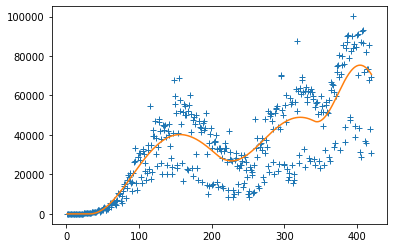

[0.005812258887005071, 3.367910559156396, 0.10528926441750772, 635250.9529055147, 0.0009074099128806103, 55.45735585444905, 0.2699371592271273, 1862861.1985496473, 0.0008823769063436946, 156.90989375282277, 0.4602731962863546, 2146985.9351773653]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 4.867910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61.78515136181227), (0.2124607255704552, 0.3124607255704552), (981893.0542155295, 2481893.0542155295), (0.0008562991359240661, 0.001006299135924066), (82.24660561441203, 182.24660561441203), (0.319621784706916, 0.46962178470691596), (1862493.1098711556, 3362493.1098711556)]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 4.867910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61

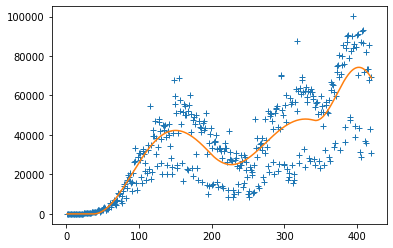

[0.006529471958192556, 4.087295946479424, 0.10945881434366682, 630618.7613968124, 0.0009031581392886712, 49.06053672781965, 0.24738416994540652, 1890227.7737321586, 0.0009132039901720369, 156.14682566671777, 0.458392689325015, 1862493.1098711556]
Iteração: 150


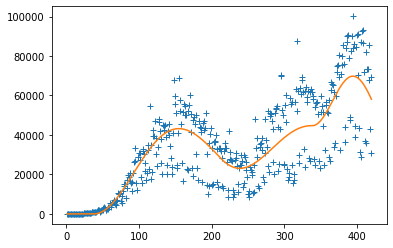

[0.006552177773032037, 3.9913935895839523, 0.10554108402462717, 643044.8232845913, 0.0009178117157452954, 54.16905970551142, 0.25567154160116384, 1736688.4518365194, 0.0008767822200125238, 174.09367305694173, 0.5145622264679793, 1596803.928576255]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 4.867910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61.78515136181227), (0.2124607255704552, 0.3124607255704552), (981893.0542155295, 2481893.0542155295), (0.0008062991359240661, 0.001006299135924066), (82.24660561441203, 182.24660561441203), (0.319621784706916, 0.519621784706916), (1362493.1098711556, 3362493.1098711556)]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 5.367910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61.

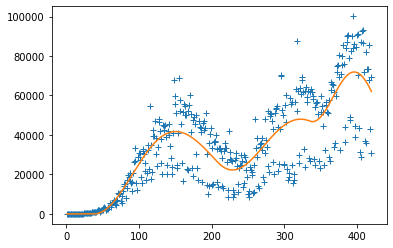

[0.005865390293509052, 4.455480211198626, 0.11636561361713342, 656424.461846789, 0.0009019777920166809, 58.47704184975154, 0.28163125905172937, 1880737.6627049178, 0.0008609007809577708, 159.53628141411275, 0.47579257533708996, 1997112.9774366177]
Iteração: 250


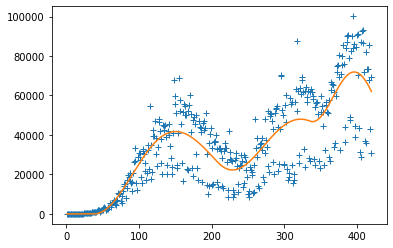

[0.005865390293509052, 4.455480211198626, 0.11636561361713342, 656424.461846789, 0.0009019777920166809, 58.47704184975154, 0.28163125905172937, 1880737.6627049178, 0.0008609007809577708, 159.53628141411275, 0.47579257533708996, 1997112.9774366177]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 5.367910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61.78515136181227), (0.2124607255704552, 0.3124607255704552), (981893.0542155295, 2481893.0542155295), (0.0008062991359240661, 0.001006299135924066), (82.24660561441203, 182.24660561441203), (0.319621784706916, 0.519621784706916), (1362493.1098711556, 3362493.1098711556)]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 5.367910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61.

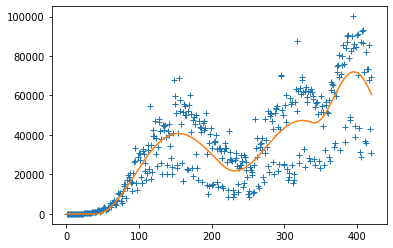

[0.006121688149202986, 4.586377575503489, 0.11280984008278512, 627042.6123078798, 0.0008846254681147945, 61.192285819743894, 0.28853795233555896, 1869348.464712189, 0.0008837273533139991, 168.83435260819215, 0.499417795207394, 1943318.040873103]
Iteração: 350


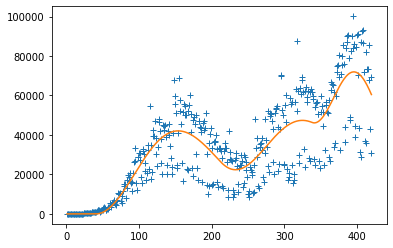

[0.006121688149202986, 4.586377575503489, 0.11280984008278512, 647784.3378236042, 0.0008846254681147945, 61.192285819743894, 0.28853795233555896, 1869348.464712189, 0.0008837273533139991, 168.83435260819215, 0.499417795207394, 1943318.040873103]
Iteração: 400


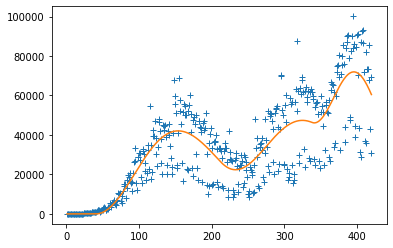

[0.006121688149202986, 4.586377575503489, 0.11280984008278512, 647784.3378236042, 0.0008846254681147945, 61.192285819743894, 0.28853795233555896, 1869348.464712189, 0.0008837273533139991, 168.83435260819215, 0.499417795207394, 1943318.040873103]
Iteração: 450


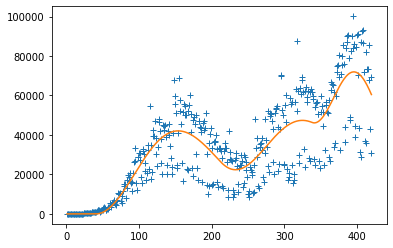

[0.006121688149202986, 4.586377575503489, 0.11280984008278512, 647784.3378236042, 0.0008846254681147945, 61.192285819743894, 0.28853795233555896, 1869348.464712189, 0.0008837273533139991, 168.83435260819215, 0.499417795207394, 1943318.040873103]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 5.367910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009329396483338294), (46.78515136181227, 61.78515136181227), (0.2124607255704552, 0.3124607255704552), (981893.0542155295, 2481893.0542155295), (0.0008062991359240661, 0.001006299135924066), (82.24660561441203, 182.24660561441203), (0.319621784706916, 0.569621784706916), (1362493.1098711556, 3362493.1098711556)]
[(0.005574231713738014, 0.007074231713738015), (2.867910559156396, 5.367910559156396), (0.056614624190322343, 0.15661462419032235), (596903.855278429, 746903.855278429), (0.0007829396483338293, 0.0009829396483338293), (46.78515136181227, 61.78

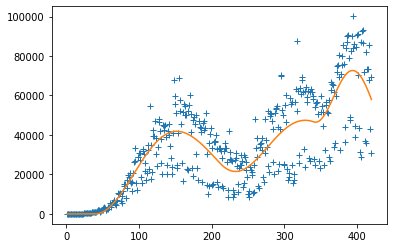

[0.006759756378828882, 4.302082937289346, 0.10824243269510325, 613201.7188420717, 0.0008873216687346295, 58.69975370422634, 0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 182.24660561441203, 0.534960809047034, 1802457.1288457094]
[0.006759756378828882, 4.302082937289346, 0.10824243269510325, 613201.7188420717, 0.0008873216687346295, 58.69975370422634, 0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 182.24660561441203, 0.534960809047034, 1802457.1288457094]


<Figure size 432x288 with 0 Axes>

In [28]:
#Adjusting the two waves at the same time with the new model:

x_dados = np.array(cases_data['dia_epidemiologico'])
y_dados = np.array(cases_data['casos'])

cost_func = rsme
objective_function_name = 'dist_maxwell_boltzmann'

#Parameters based on the predecessor runs:
wave_1 = [0.006074231713738014, 3.867910559156396, 0.10661462419032235, 646903.855278429]
wave_2 = [0.0008829396483338293, 51.78515136181227, 0.2624607255704552, 1981893.0542155295]
wave_3 = [0.0009562991359240661, 132.24660561441203, 0.41962178470691597, 2862493.1098711556]

popsize = 120              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 500              #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

bounds = [(wave_1[0]-bound_parameter*10**order_of_magnitude(wave_1[0]),
           wave_1[0]+bound_parameter*10**order_of_magnitude(wave_1[0])),
          (wave_1[1]-bound_parameter*10**order_of_magnitude(wave_1[1]),
           wave_1[1]+bound_parameter*10**order_of_magnitude(wave_1[1])), 
          (wave_1[2]-bound_parameter*10**order_of_magnitude(wave_1[2]),
           wave_1[2]+bound_parameter*10**order_of_magnitude(wave_1[2])),
          (wave_1[3]-bound_parameter*10**order_of_magnitude(wave_1[3]),
           wave_1[3]+bound_parameter*10**order_of_magnitude(wave_1[3])), 
          (wave_2[0]-bound_parameter*10**order_of_magnitude(wave_2[0]),
           wave_2[0]+bound_parameter*10**order_of_magnitude(wave_2[0])),
          (wave_2[1]-bound_parameter*10**order_of_magnitude(wave_2[1]),
           wave_2[1]+bound_parameter*10**order_of_magnitude(wave_2[1])), 
          (wave_2[2]-bound_parameter*10**order_of_magnitude(wave_2[2]),
           wave_2[2]+bound_parameter*10**order_of_magnitude(wave_2[2])),
          (wave_2[3]-bound_parameter*10**order_of_magnitude(wave_2[3]),
           wave_2[3]+bound_parameter*10**order_of_magnitude(wave_2[3])),
          (wave_3[0]-bound_parameter*10**order_of_magnitude(wave_3[0]),
           wave_3[0]+bound_parameter*10**order_of_magnitude(wave_3[0])),
          (wave_3[1]-bound_parameter*10**order_of_magnitude(wave_3[1]),
           wave_3[1]+bound_parameter*10**order_of_magnitude(wave_3[1])), 
          (wave_3[2]-bound_parameter*10**order_of_magnitude(wave_3[2]),
           wave_3[2]+bound_parameter*10**order_of_magnitude(wave_3[2])),
          (wave_3[3]-bound_parameter*10**order_of_magnitude(wave_3[3]),
           wave_3[3]+bound_parameter*10**order_of_magnitude(wave_3[3]))]

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


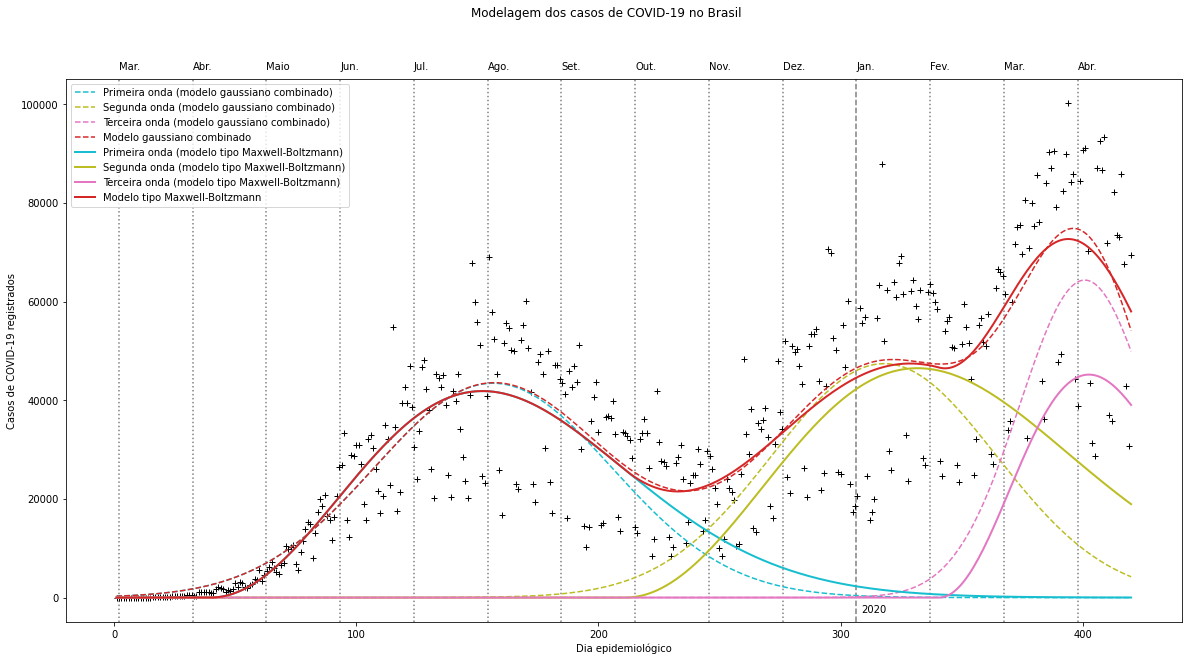

In [29]:
#Plot the fitting and forecast of the models:

gauss_parameters = [43447.65525752633, 156.49536601075997, 49.02565213922403, 
                    47421.207943019974, 317.9636097998259, 46.38808712307434, 
                    64351.56335819904, 400.85851310750627, 26.860775602409262]

max_bol_parameters = [0.006759756378828882, 4.302082937289346, 0.10824243269510325, 
                      613201.7188420717, 0.0008873216687346295, 58.69975370422634, 
                      0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 
                      182.24660561441203, 0.534960809047034, 1802457.1288457094]

plt.figure(figsize=(20,10))
#plt.grid(True)
plt.ylabel('Casos de COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de COVID-19 no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(len(cases_data['dia_epidemiologico'])):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = -59
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day > 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 107000, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -3000, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 107000, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(cases_data['dia_epidemiologico'], cases_data['casos'], 'k+')

#Old model:

tmp_list = []
for i in range(len(cases_data['dia_epidemiologico'])): 
    tmp_list.append(single_gaussian(cases_data['dia_epidemiologico'].iloc[i],
                                    [gauss_parameters[0], 
                                     gauss_parameters[1], 
                                     gauss_parameters[2]]))
plt.plot(cases_data['dia_epidemiologico'], tmp_list, c='tab:cyan', linestyle='--',
         label='Primeira onda (modelo gaussiano combinado)')

tmp_list = []
for i in range(len(cases_data['dia_epidemiologico'])): 
    tmp_list.append(single_gaussian(cases_data['dia_epidemiologico'].iloc[i],
                                    [gauss_parameters[3], 
                                     gauss_parameters[4], 
                                     gauss_parameters[5]]))
plt.plot(cases_data['dia_epidemiologico'], tmp_list, c='tab:olive', linestyle='--',
         label='Segunda onda (modelo gaussiano combinado)')

tmp_list = []
for i in range(len(cases_data['dia_epidemiologico'])): 
    tmp_list.append(single_gaussian(cases_data['dia_epidemiologico'].iloc[i],
                                    [gauss_parameters[6], 
                                     gauss_parameters[7], 
                                     gauss_parameters[8]]))
plt.plot(cases_data['dia_epidemiologico'], tmp_list, c='tab:pink', linestyle='--',
         label='Terceira onda (modelo gaussiano combinado)')

tmp_list = []
for i in range(len(cases_data['dia_epidemiologico'])): 
    tmp_list.append(triple_gaussian(cases_data['dia_epidemiologico'].iloc[i],
                                    gauss_parameters))
plt.plot(cases_data['dia_epidemiologico'], tmp_list, c='tab:red', linestyle='--',
         label='Modelo gaussiano combinado')

#New model:

plt.plot(cases_data['dia_epidemiologico'],
         single_maxwell_boltzmann(cases_data['dia_epidemiologico'],
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(cases_data['dia_epidemiologico'],
         single_maxwell_boltzmann(cases_data['dia_epidemiologico'],
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(cases_data['dia_epidemiologico'],
         single_maxwell_boltzmann(cases_data['dia_epidemiologico'],
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(cases_data['dia_epidemiologico'],
         dist_maxwell_boltzmann(cases_data['dia_epidemiologico'], max_bol_parameters), 
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=2)

plt.show()


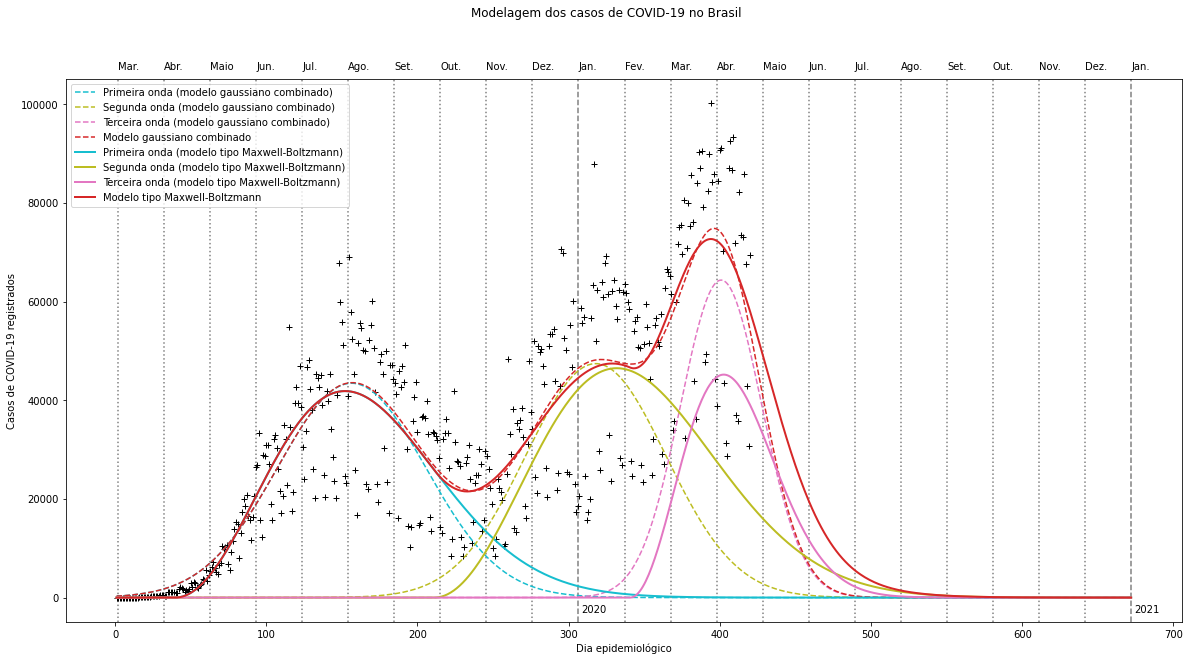

In [31]:
#Plot the fitting and forecast of the models:

plt.figure(figsize=(20,10))
#plt.grid(True)
plt.ylabel('Casos de COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de COVID-19 no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(672):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = -59
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day > 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 107000, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -3000, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 107000, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(cases_data['dia_epidemiologico'], cases_data['casos'], 'k+')

#Old model:

tmp_list = []
for i in range(len(future_dias)): 
    tmp_list.append(single_gaussian(future_dias[i],
                                    [gauss_parameters[0], 
                                     gauss_parameters[1], 
                                     gauss_parameters[2]]))
plt.plot(future_dias, tmp_list, c='tab:cyan', linestyle='--',
         label='Primeira onda (modelo gaussiano combinado)')

tmp_list = []
for i in range(len(future_dias)): 
    tmp_list.append(single_gaussian(future_dias[i],
                                    [gauss_parameters[3], 
                                     gauss_parameters[4], 
                                     gauss_parameters[5]]))
plt.plot(future_dias, tmp_list, c='tab:olive', linestyle='--',
         label='Segunda onda (modelo gaussiano combinado)')

tmp_list = []
for i in range(len(future_dias)): 
    tmp_list.append(single_gaussian(future_dias[i],
                                    [gauss_parameters[6], 
                                     gauss_parameters[7], 
                                     gauss_parameters[8]]))
plt.plot(future_dias, tmp_list, c='tab:pink', linestyle='--',
         label='Terceira onda (modelo gaussiano combinado)')

tmp_list = []
for i in range(len(future_dias)): 
    tmp_list.append(triple_gaussian(future_dias[i], gauss_parameters))
plt.plot(future_dias, tmp_list, c='tab:red', linestyle='--',
         label='Modelo gaussiano combinado')

#New model:

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         dist_maxwell_boltzmann(future_dias, max_bol_parameters),
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=2)

plt.show()


NEW COVID-19 DEATH CASES ANALYSIS:

In [ ]:
#Fit the first wave with the new model:

deaths_data_tmp = deaths_data.copy()

for i in range(len(deaths_data_tmp)): 
    if i > 255: deaths_data_tmp.drop([i], inplace=True)

x_dados = np.array(deaths_data_tmp['dia_epidemiologico'])
y_dados = np.array(deaths_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.038,0.0053), (0.0,2.0), (0.06,0.16), (14000.,24000.)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 300              #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the first wave with the new model:

deaths_data_tmp = deaths_data.copy()

for i in range(len(deaths_data_tmp)): 
    if i < 255 or i > 360: deaths_data_tmp.drop([i], inplace=True)

x_dados = np.array(deaths_data_tmp['dia_epidemiologico'])
y_dados = np.array(deaths_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(2.3e-05,7.3e-04),
          (30.0,130.0),
          (0.17,0.67),
          (29000.,84000.)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 1000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

deaths_data_tmp = deaths_data.copy()

for i in range(len(deaths_data_tmp)): 
    if i < 380: deaths_data_tmp.drop([i], inplace=True)

x_dados = np.array(deaths_data_tmp['dia_epidemiologico'])
y_dados = np.array(deaths_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (100,500), (1e-2,1), (1e1,1e7)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 2000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


[(0.005629248098563125, 0.0066292480985631255), (0.8279665136558683, 0.9279665136558684), (0.09239480031657152, 0.10239480031657153), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.0003577302367128252), (36.34057062551007, 46.34057062551007), (0.19016799319403604, 0.290167993194036), (81083.85233094973, 91083.85233094973), (0.0008608286939619968, 0.0009608286939619969), (169.91001108366063, 269.9100110836606), (0.5737892029232252, 0.6737892029232253), (68000.80547970136, 168000.80547970138)]
[(0.005629248098563125, 0.0066292480985631255), (0.8279665136558683, 0.9279665136558684), (0.09239480031657152, 0.10239480031657153), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.0003577302367128252), (36.34057062551007, 46.34057062551007), (0.19016799319403604, 0.290167993194036), (81083.85233094973, 91083.85233094973), (0.0008608286939619968, 0.0009608286939619969), (169.91001108366063, 269.9100110836606), (0.5737892029232252, 0.6737892029232253), (63

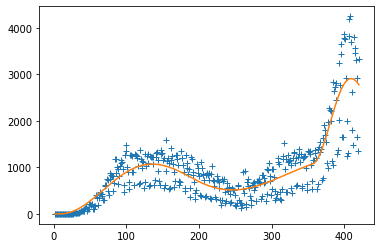

[0.006002049139387439, 0.8555672252638651, 0.10156880782956898, 16646.29597300008, 0.000345154024147788, 43.25302722222628, 0.23148342628902735, 81155.68302210476, 0.0008989727064188408, 226.37050124749953, 0.6354165904167934, 66735.3161079977]
[(0.005129248098563124, 0.007129248098563126), (0.8279665136558683, 0.9279665136558684), (0.08739480031657151, 0.15239480031657154), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.00045773023671282523), (31.34057062551007, 51.34057062551007), (0.19016799319403604, 0.290167993194036), (81083.85233094973, 96083.85233094973), (0.0008608286939619968, 0.0009608286939619969), (169.91001108366063, 269.9100110836606), (0.5737892029232252, 0.6737892029232253), (58000.80547970136, 168000.80547970138)]
[(0.005129248098563124, 0.007129248098563126), (0.7779665136558682, 0.9279665136558684), (0.08739480031657151, 0.15239480031657154), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.00045773023671282523), (31.3405706

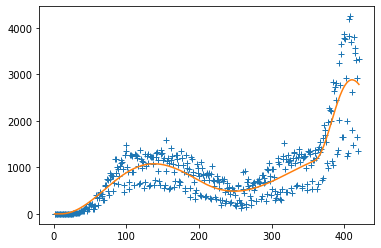

[0.006072265700394543, 0.8875523140818137, 0.09948850605462536, 16655.826758319025, 0.000395850608529063, 44.43803453435325, 0.22270781476627136, 83087.32215924664, 0.0009150042551052545, 233.03363901495703, 0.6492385480592129, 60582.50261793004]
[(0.005129248098563124, 0.007629248098563126), (0.7779665136558682, 0.9779665136558684), (0.08739480031657151, 0.15239480031657154), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.00045773023671282523), (31.34057062551007, 56.34057062551007), (0.19016799319403604, 0.290167993194036), (76083.85233094973, 101083.85233094973), (0.0008608286939619968, 0.0009608286939619969), (169.91001108366063, 269.9100110836606), (0.5737892029232252, 0.7237892029232253), (53000.80547970136, 168000.80547970138)]
[(0.005129248098563124, 0.007629248098563126), (0.7779665136558682, 0.9779665136558684), (0.08739480031657151, 0.15239480031657154), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.00045773023671282523), (31.3405

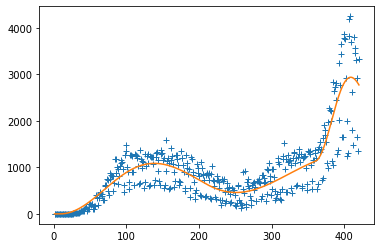

[0.005688823081280036, 0.8660224057557798, 0.1020535555046891, 17354.584095383514, 0.0004259365219726551, 48.46231076011537, 0.23271693835339943, 76928.5189707176, 0.0009521548520719568, 243.12920318427354, 0.6746453163722141, 63273.73170933346]
Iteração: 200


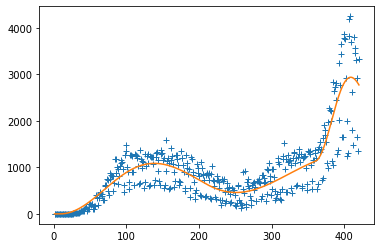

[0.005688823081280036, 0.8660224057557798, 0.1020535555046891, 17354.584095383514, 0.0004259365219726551, 48.46231076011537, 0.23271693835339943, 76928.5189707176, 0.0009521548520719568, 243.12920318427354, 0.6746453163722141, 63273.73170933346]
Iteração: 250


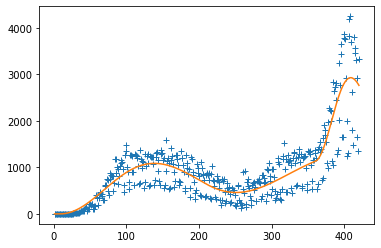

[0.005688823081280036, 0.8660224057557798, 0.1020535555046891, 17354.584095383514, 0.0004259365219726551, 48.46231076011537, 0.23271693835339943, 76928.5189707176, 0.0009533647548462132, 243.12920318427354, 0.6746453163722141, 62887.81922183542]
[(0.005129248098563124, 0.007629248098563126), (0.7779665136558682, 0.9779665136558684), (0.08739480031657151, 0.15239480031657154), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.00045773023671282523), (31.34057062551007, 56.34057062551007), (0.19016799319403604, 0.290167993194036), (76083.85233094973, 101083.85233094973), (0.0008608286939619968, 0.0010108286939619969), (169.91001108366063, 269.9100110836606), (0.5737892029232252, 0.7237892029232253), (53000.80547970136, 168000.80547970138)]
[(0.005129248098563124, 0.007629248098563126), (0.7779665136558682, 1.0279665136558684), (0.08739480031657151, 0.15239480031657154), (12039.278299107515, 22039.278299107515), (0.00025773023671282514, 0.00045773023671282523), (31.34057

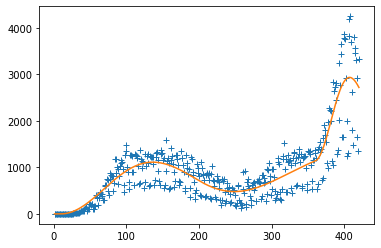

[0.006656179753447775, 0.9169108941626404, 0.09669277512387947, 16427.182320667176, 0.0003768398116585315, 45.51246769211442, 0.22937226378029055, 83553.31240829999, 0.0009847727283607182, 247.74963292420645, 0.6877113931536114, 61431.15991766889]
Iteração: 350


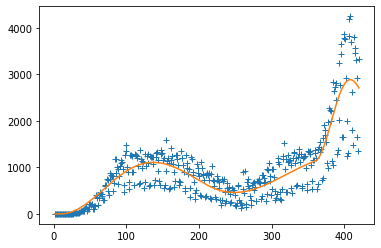

[0.006192697303665649, 0.8813618209460743, 0.09939638232771333, 16962.8276657402, 0.0003335679123366098, 55.45405309876489, 0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 236.00612240496054, 0.656007574245604, 61185.32008260153]
Iteração: 400


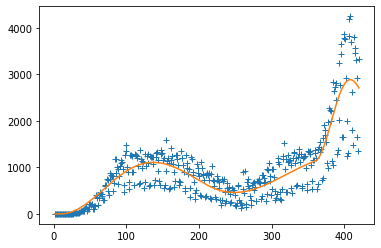

[0.006192697303665649, 0.8813618209460743, 0.09939638232771333, 16962.8276657402, 0.0003335679123366098, 55.45405309876489, 0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 236.00612240496054, 0.656007574245604, 61185.32008260153]
Iteração: 450


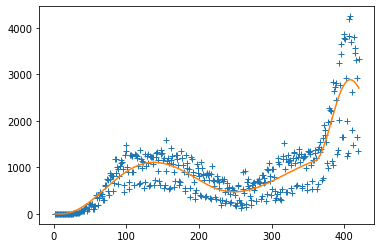

[0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 16962.8276657402, 0.0003335679123366098, 55.17525093886882, 0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 236.00612240496054, 0.656007574245604, 61122.13420083932]
Iteração: 500


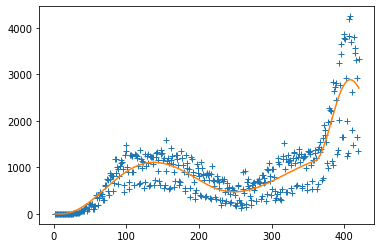

[0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 16962.8276657402, 0.0003335679123366098, 55.17525093886882, 0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 236.00612240496054, 0.656007574245604, 61122.13420083932]
[0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 16962.8276657402, 0.0003335679123366098, 55.17525093886882, 0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 236.00612240496054, 0.656007574245604, 61122.13420083932]


<Figure size 432x288 with 0 Axes>

In [35]:
#Adjusting the two waves at the same time with the new model:

x_dados = np.array(deaths_data['dia_epidemiologico'])
y_dados = np.array(deaths_data['casos'])

cost_func = rsme
objective_function_name = 'dist_maxwell_boltzmann'

#Parameters based on the predecessor runs:
wave_1 = [0.006129248098563125, 0.8779665136558683, 0.09739480031657152, 17039.278299107515]
wave_2 = [0.00030773023671282516, 41.34057062551007, 0.24016799319403603, 86083.85233094973]
wave_3 = [0.0009108286939619968, 219.91001108366063, 0.6237892029232253, 118000.80547970136]

popsize = 120              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 500              #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

bounds = [(wave_1[0]-bound_parameter*10**order_of_magnitude(wave_1[0]),
           wave_1[0]+bound_parameter*10**order_of_magnitude(wave_1[0])),
          (wave_1[1]-bound_parameter*10**order_of_magnitude(wave_1[1]),
           wave_1[1]+bound_parameter*10**order_of_magnitude(wave_1[1])), 
          (wave_1[2]-bound_parameter*10**order_of_magnitude(wave_1[2]),
           wave_1[2]+bound_parameter*10**order_of_magnitude(wave_1[2])),
          (wave_1[3]-bound_parameter*10**order_of_magnitude(wave_1[3]),
           wave_1[3]+bound_parameter*10**order_of_magnitude(wave_1[3])), 
          (wave_2[0]-bound_parameter*10**order_of_magnitude(wave_2[0]),
           wave_2[0]+bound_parameter*10**order_of_magnitude(wave_2[0])),
          (wave_2[1]-bound_parameter*10**order_of_magnitude(wave_2[1]),
           wave_2[1]+bound_parameter*10**order_of_magnitude(wave_2[1])), 
          (wave_2[2]-bound_parameter*10**order_of_magnitude(wave_2[2]),
           wave_2[2]+bound_parameter*10**order_of_magnitude(wave_2[2])),
          (wave_2[3]-bound_parameter*10**order_of_magnitude(wave_2[3]),
           wave_2[3]+bound_parameter*10**order_of_magnitude(wave_2[3])),
          (wave_3[0]-bound_parameter*10**order_of_magnitude(wave_3[0]),
           wave_3[0]+bound_parameter*10**order_of_magnitude(wave_3[0])),
          (wave_3[1]-bound_parameter*10**order_of_magnitude(wave_3[1]),
           wave_3[1]+bound_parameter*10**order_of_magnitude(wave_3[1])), 
          (wave_3[2]-bound_parameter*10**order_of_magnitude(wave_3[2]),
           wave_3[2]+bound_parameter*10**order_of_magnitude(wave_3[2])),
          (wave_3[3]-bound_parameter*10**order_of_magnitude(wave_3[3]),
           wave_3[3]+bound_parameter*10**order_of_magnitude(wave_3[3]))]

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


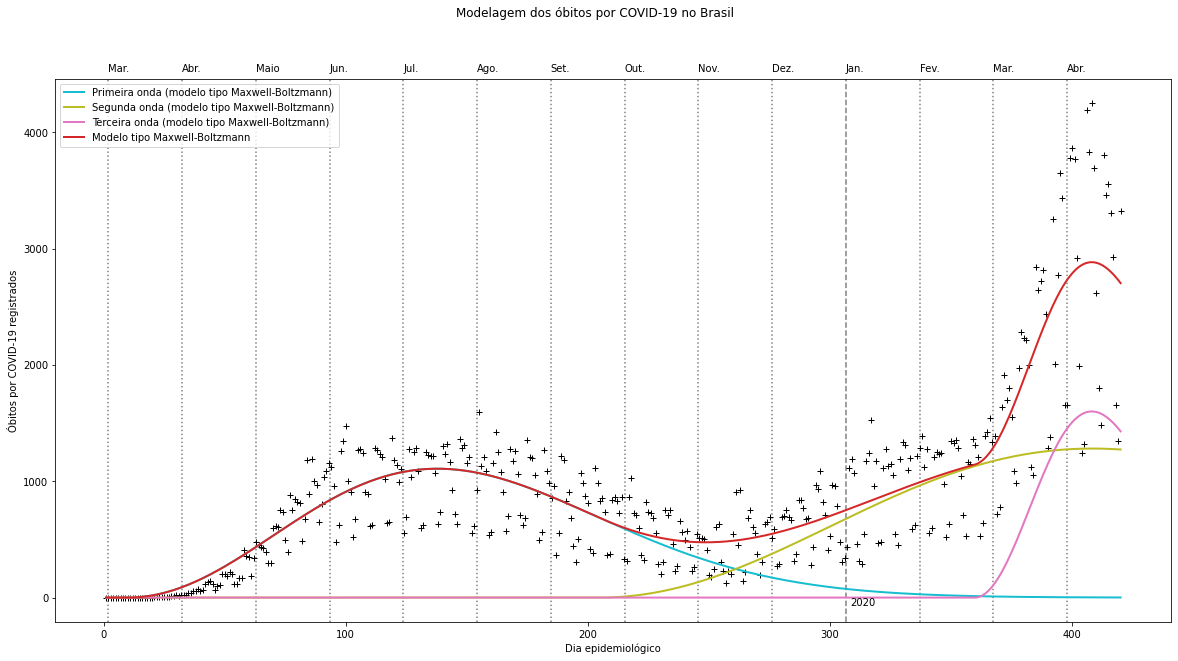

In [11]:
#Plot the fitting and forecast of the models:

max_bol_parameters = [0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 
                      16962.8276657402, 0.0003335679123366098, 55.17525093886882, 
                      0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 
                      236.00612240496054, 0.656007574245604, 61122.13420083932]

plt.figure(figsize=(20,10))
#plt.grid(True)
plt.ylabel('Óbitos por COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por COVID-19 no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(len(deaths_data['dia_epidemiologico'])):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = -59
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day > 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 4525, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -70, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 4525, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(deaths_data['dia_epidemiologico'], deaths_data['casos'], 'k+')

#New model:

plt.plot(cases_data['dia_epidemiologico'],
         single_maxwell_boltzmann(cases_data['dia_epidemiologico'],
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(cases_data['dia_epidemiologico'],
         single_maxwell_boltzmann(cases_data['dia_epidemiologico'],
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(cases_data['dia_epidemiologico'],
         single_maxwell_boltzmann(cases_data['dia_epidemiologico'],
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(cases_data['dia_epidemiologico'],
         dist_maxwell_boltzmann(cases_data['dia_epidemiologico'], max_bol_parameters), 
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=2)

plt.show()


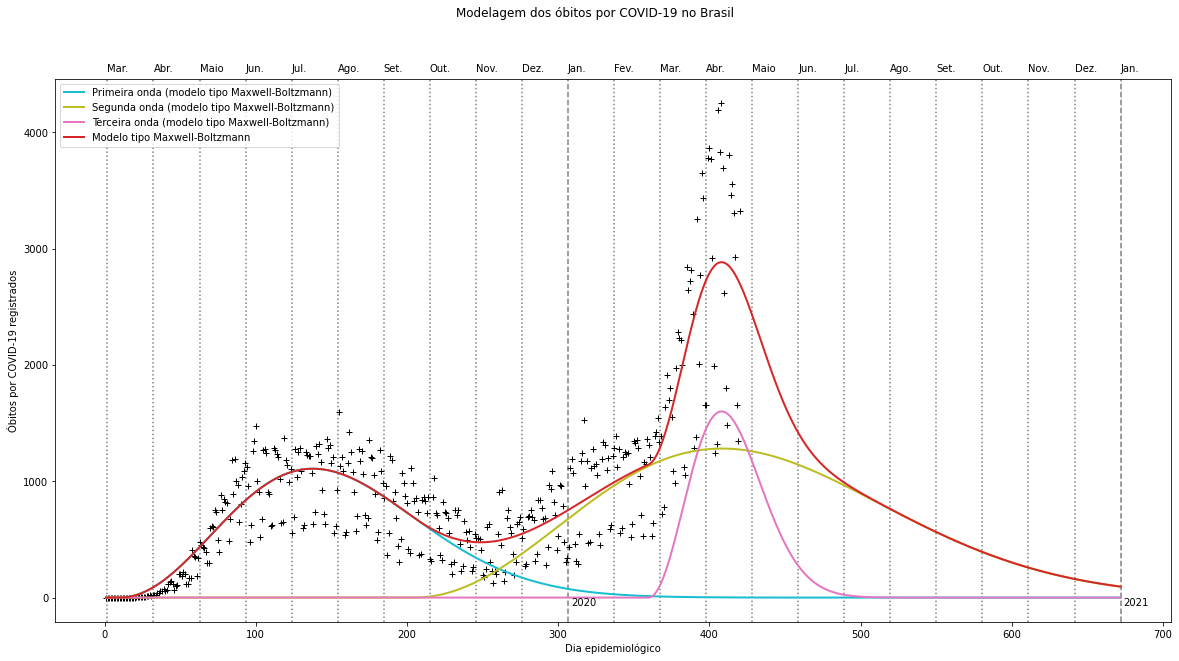

In [12]:
#Plot the fitting and forecast of the models:

plt.figure(figsize=(20,10))
#plt.grid(True)
plt.ylabel('Óbitos por COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por COVID-19 no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(672):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = -59
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day > 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 4525, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -70, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 4525, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(deaths_data['dia_epidemiologico'], deaths_data['casos'], 'k+')

#New model:

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         dist_maxwell_boltzmann(future_dias, max_bol_parameters),
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=2)

plt.show()


NEW SRAG CASES ANALYSIS:

In [ ]:
#Fit the first wave with the new model:

srag_cases_data_tmp = srag_cases_data.copy()

for i in range(len(srag_cases_data_tmp)): 
    if i > 43: srag_cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(srag_cases_data_tmp['semana_epidemiologica'])
y_dados = np.array(srag_cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(1e-10,1e-1), (1e-10,50), (1e-2,1), (1e1,1e7)]

popsize = 80               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

srag_cases_data_tmp = srag_cases_data.copy()

for i in range(len(srag_cases_data_tmp)): 
    if i < 44 or i > 56: srag_cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(srag_cases_data_tmp['semana_epidemiologica'])
y_dados = np.array(srag_cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (5.3270375931294005,500), (1e-2,1), (1e1,1e7)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 2000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

srag_cases_data_tmp = srag_cases_data.copy()

for i in range(len(srag_cases_data_tmp)): 
    if i < 58: srag_cases_data_tmp.drop([i], inplace=True)

x_dados = np.array(srag_cases_data_tmp['semana_epidemiologica'])
y_dados = np.array(srag_cases_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (5.3270375931294005,500), (1e-2,1), (1e1,1e7)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


[(0.014641215567528287, 0.02464121556752829), (0.5314831428009619, 1.5314831428009619), (0.039148945847297396, 0.04914894584729739), (260361.41915515077, 360361.41915515077), (0.00037532346387272604, 0.0004753234638727261), (66.07787824577368, 76.07787824577368), (0.2738243712338237, 0.37382437123382367), (1378794.812833069, 2378794.812833069), (0.0007875806152871996, 0.0017875806152871996), (136.88291707039602, 236.88291707039602), (0.4382252888808779, 0.538225288880878), (1542215.7713496555, 2542215.7713496555)]
[(0.014641215567528287, 0.02464121556752829), (0.5314831428009619, 1.5314831428009619), (0.039148945847297396, 0.04914894584729739), (260361.41915515077, 360361.41915515077), (0.00037532346387272604, 0.0004753234638727261), (61.077878245773675, 76.07787824577368), (0.2738243712338237, 0.37382437123382367), (1378794.812833069, 2378794.812833069), (0.0007875806152871996, 0.0017875806152871996), (136.88291707039602, 236.88291707039602), (0.4382252888808779, 0.538225288880878), (

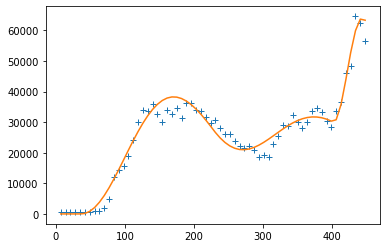

[0.024487903841052757, 1.76367688016526, 0.04783285109942235, 294594.20893941715, 0.0004881987485891808, 67.4918494483866, 0.2962899580121119, 1673521.3054832832, 0.0015921513263072408, 222.20488548327523, 0.5538948491436336, 1257112.1247606738]
Iteração: 200


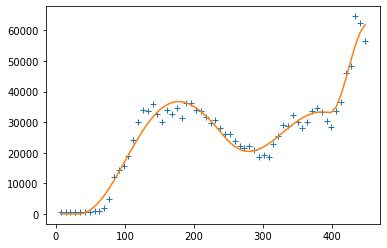

[0.02055679086446691, 1.604159894266846, 0.048273073193918305, 308707.84100633324, 0.0004848952913692954, 74.67733171340258, 0.3054702319605633, 1748426.3421798646, 0.0010480393673674504, 196.57773335606777, 0.4964668137953401, 1443791.523500409]
[(0.014641215567528287, 0.02964121556752829), (0.5314831428009619, 2.031483142800962), (0.039148945847297396, 0.04914894584729739), (260361.41915515077, 360361.41915515077), (0.000325323463872726, 0.0005253234638727261), (61.077878245773675, 81.07787824577368), (0.2738243712338237, 0.37382437123382367), (1378794.812833069, 2378794.812833069), (0.0006875806152871996, 0.0017875806152871996), (136.88291707039602, 236.88291707039602), (0.4382252888808779, 0.588225288880878), (1042215.7713496555, 2542215.7713496555)]
[(0.014641215567528287, 0.02964121556752829), (0.5314831428009619, 2.031483142800962), (0.039148945847297396, 0.04914894584729739), (260361.41915515077, 360361.41915515077), (0.000325323463872726, 0.0005253234638727261), (61.0778782457

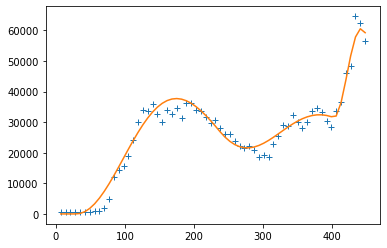

[0.023845591700188663, 1.3194061026395953, 0.044674267377002086, 294201.7001865662, 0.0004880412873977471, 69.80013817112125, 0.2947168997155408, 1688482.5864386307, 0.0016748481408651868, 230.02677369002754, 0.5721781815926319, 1042215.7713496555]
Iteração: 400


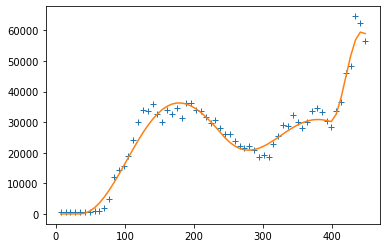

[0.022978180813694883, 1.616642102614894, 0.046012247975321524, 288446.9697363032, 0.0004861975283728761, 73.90259595863371, 0.3070451030714285, 1601218.4984307406, 0.001515835149377856, 204.2797663167995, 0.5147257058450586, 1141818.1796632926]
[(0.014641215567528287, 0.02964121556752829), (0.5314831428009619, 2.031483142800962), (0.039148945847297396, 0.04914894584729739), (260361.41915515077, 360361.41915515077), (0.000325323463872726, 0.0005253234638727261), (61.077878245773675, 81.07787824577368), (0.2738243712338237, 0.37382437123382367), (1378794.812833069, 2378794.812833069), (0.0006875806152871996, 0.0017875806152871996), (136.88291707039602, 236.88291707039602), (0.4382252888808779, 0.588225288880878), (542215.7713496555, 2542215.7713496555)]
[(0.014641215567528287, 0.02964121556752829), (0.5314831428009619, 2.031483142800962), (0.039148945847297396, 0.04914894584729739), (260361.41915515077, 360361.41915515077), (0.000325323463872726, 0.0005753234638727261), (61.077878245773

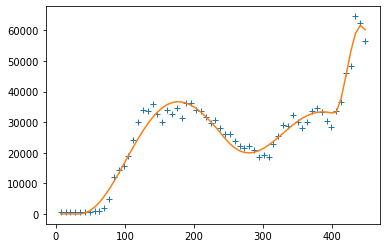

[0.023845591700188663, 1.5696628559116679, 0.045367459919391354, 286196.1167612723, 0.0005253234638727261, 72.23631605811363, 0.2947168997155408, 1688482.5864386307, 0.0016748481408651868, 230.02677369002754, 0.5721781815926319, 1042215.7713496555]
Iteração: 600


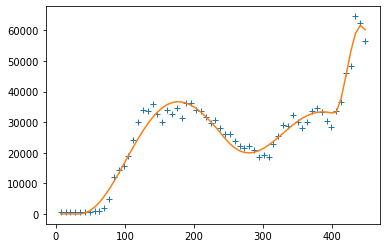

[0.023845591700188663, 1.5696628559116679, 0.045367459919391354, 286196.1167612723, 0.0005253234638727261, 72.23631605811363, 0.2947168997155408, 1688482.5864386307, 0.0016748481408651868, 230.02677369002754, 0.5721781815926319, 1042215.7713496555]
Iteração: 700


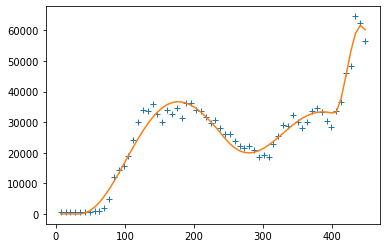

[0.023845591700188663, 1.5696628559116679, 0.045367459919391354, 286196.1167612723, 0.0005253234638727261, 72.23631605811363, 0.2947168997155408, 1688482.5864386307, 0.0016748481408651868, 230.02677369002754, 0.5721781815926319, 1042215.7713496555]
Iteração: 800


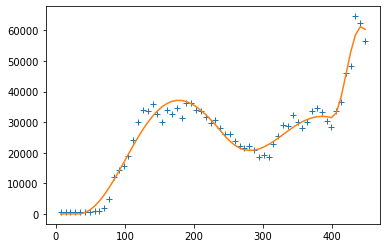

[0.025848989091852237, 1.398677128715782, 0.0428443160147331, 278266.1881074972, 0.0005334603790478621, 69.83920941952303, 0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 219.33584482690588, 0.549217898973079, 1107011.7268371938]
Iteração: 900


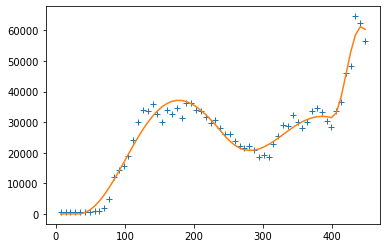

[0.025848989091852237, 1.398677128715782, 0.0428443160147331, 278266.1881074972, 0.0005334603790478621, 69.83920941952303, 0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 219.33584482690588, 0.549217898973079, 1107011.7268371938]
Iteração: 1000


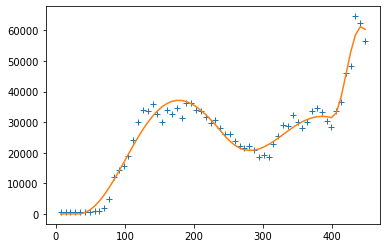

[0.025848989091852237, 1.398677128715782, 0.0428443160147331, 278266.1881074972, 0.0005334603790478621, 69.83920941952303, 0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 219.33584482690588, 0.549217898973079, 1107011.7268371938]
[0.025848989091852237, 1.398677128715782, 0.0428443160147331, 278266.1881074972, 0.0005334603790478621, 69.83920941952303, 0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 219.33584482690588, 0.549217898973079, 1107011.7268371938]


<Figure size 432x288 with 0 Axes>

In [17]:
#Adjusting the two waves at the same time with the new model:

x_dados = np.array(srag_cases_data['semana_epidemiologica'])
y_dados = np.array(srag_cases_data['casos'])

cost_func = rsme
objective_function_name = 'dist_maxwell_boltzmann'

#Parameters based on the predecessor runs:
wave_1 = [0.01964121556752829, 1.0314831428009619, 0.044148945847297394, 310361.41915515077]
wave_2 = [0.00042532346387272606, 71.07787824577368, 0.3238243712338237, 1878794.812833069]
wave_3 = [0.0012875806152871996, 186.88291707039602, 0.4882252888808779, 2042215.7713496555] 

popsize = 120              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 1000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

bounds = [(wave_1[0]-bound_parameter*10**order_of_magnitude(wave_1[0]),
           wave_1[0]+bound_parameter*10**order_of_magnitude(wave_1[0])),
          (wave_1[1]-bound_parameter*10**order_of_magnitude(wave_1[1]),
           wave_1[1]+bound_parameter*10**order_of_magnitude(wave_1[1])), 
          (wave_1[2]-bound_parameter*10**order_of_magnitude(wave_1[2]),
           wave_1[2]+bound_parameter*10**order_of_magnitude(wave_1[2])),
          (wave_1[3]-bound_parameter*10**order_of_magnitude(wave_1[3]),
           wave_1[3]+bound_parameter*10**order_of_magnitude(wave_1[3])), 
          (wave_2[0]-bound_parameter*10**order_of_magnitude(wave_2[0]),
           wave_2[0]+bound_parameter*10**order_of_magnitude(wave_2[0])),
          (wave_2[1]-bound_parameter*10**order_of_magnitude(wave_2[1]),
           wave_2[1]+bound_parameter*10**order_of_magnitude(wave_2[1])), 
          (wave_2[2]-bound_parameter*10**order_of_magnitude(wave_2[2]),
           wave_2[2]+bound_parameter*10**order_of_magnitude(wave_2[2])),
          (wave_2[3]-bound_parameter*10**order_of_magnitude(wave_2[3]),
           wave_2[3]+bound_parameter*10**order_of_magnitude(wave_2[3])),
          (wave_3[0]-bound_parameter*10**order_of_magnitude(wave_3[0]),
           wave_3[0]+bound_parameter*10**order_of_magnitude(wave_3[0])),
          (wave_3[1]-bound_parameter*10**order_of_magnitude(wave_3[1]),
           wave_3[1]+bound_parameter*10**order_of_magnitude(wave_3[1])), 
          (wave_3[2]-bound_parameter*10**order_of_magnitude(wave_3[2]),
           wave_3[2]+bound_parameter*10**order_of_magnitude(wave_3[2])),
          (wave_3[3]-bound_parameter*10**order_of_magnitude(wave_3[3]),
           wave_3[3]+bound_parameter*10**order_of_magnitude(wave_3[3]))]

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


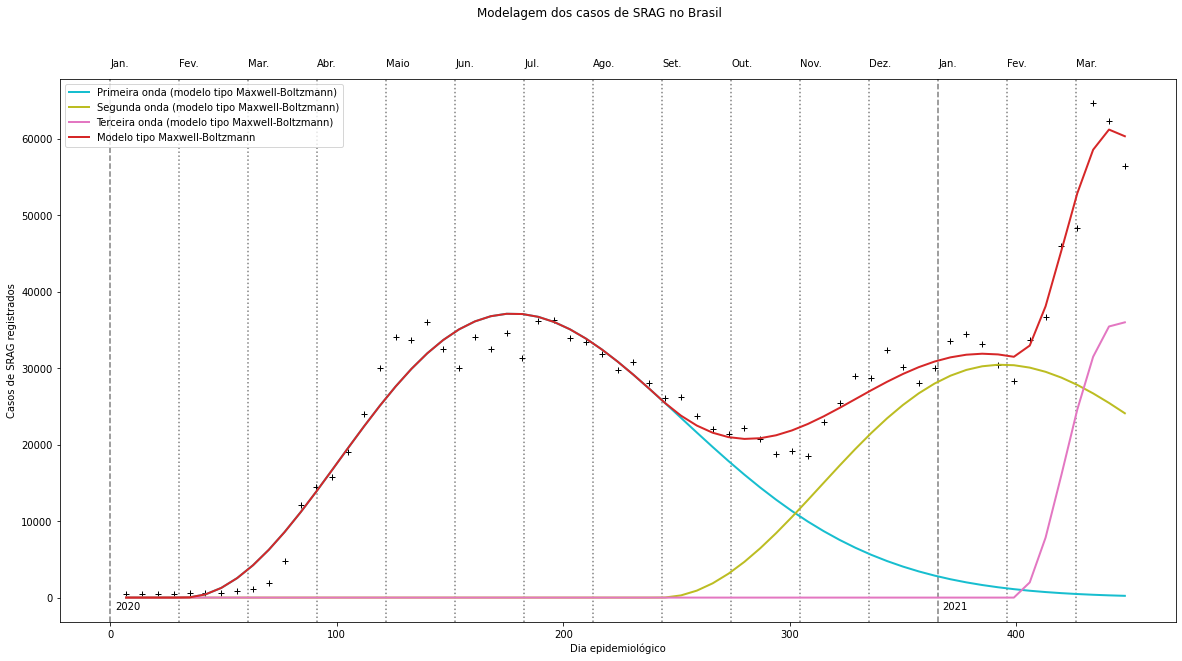

In [21]:
#Plot the fitting and forecast of the models:

max_bol_parameters = [0.025848989091852237, 1.398677128715782, 0.0428443160147331, 
                      278266.1881074972, 0.0005334603790478621, 69.83920941952303, 
                      0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 
                      219.33584482690588, 0.549217898973079, 1107011.7268371938]

plt.figure(figsize=(20,10))
#plt.grid(True)
plt.ylabel('Casos de SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de SRAG no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(len(srag_cases_data['semana_epidemiologica'])):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = 0
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias)*7:
    if initial_day >= 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 69500, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -1500, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 69500, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(srag_cases_data['semana_epidemiologica'], srag_cases_data['casos'], 'k+')

#New model:

plt.plot(srag_cases_data['semana_epidemiologica'],
         single_maxwell_boltzmann(srag_cases_data['semana_epidemiologica'],
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(srag_cases_data['semana_epidemiologica'],
         single_maxwell_boltzmann(srag_cases_data['semana_epidemiologica'],
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(srag_cases_data['semana_epidemiologica'],
         single_maxwell_boltzmann(srag_cases_data['semana_epidemiologica'],
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(srag_cases_data['semana_epidemiologica'],
         dist_maxwell_boltzmann(srag_cases_data['semana_epidemiologica'], max_bol_parameters), 
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=2)

plt.show()


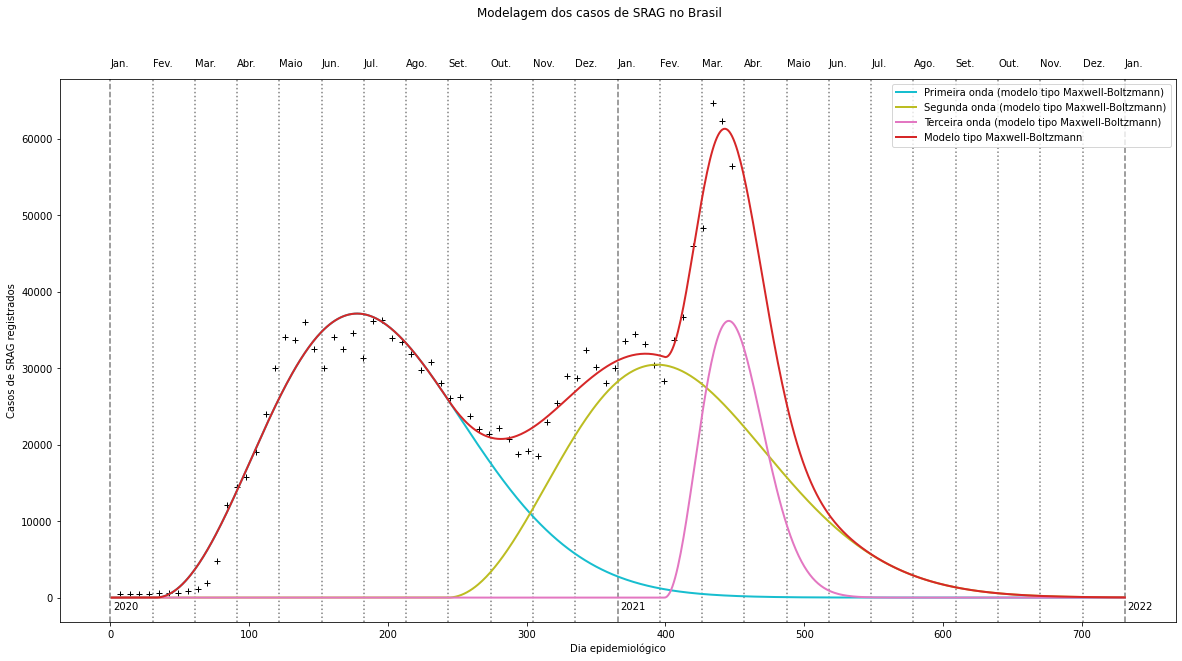

In [22]:
#Plot the fitting and forecast of the models:

plt.figure(figsize=(20,10))
#plt.grid(True)
plt.ylabel('Casos de SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de SRAG no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = 0
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day >= 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 69500, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -1500, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 69500, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(srag_cases_data['semana_epidemiologica'], srag_cases_data['casos'], 'k+')

#New model:

#New model:

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         dist_maxwell_boltzmann(future_dias, max_bol_parameters),
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=1)

plt.show()


NEW SRAG CASES ANALYSIS:

In [ ]:
#Fit the first wave with the new model:

srag_deaths_data_tmp = srag_deaths_data.copy()

for i in range(len(srag_deaths_data_tmp)): 
    if i > 43: srag_deaths_data_tmp.drop([i], inplace=True)

x_dados = np.array(srag_deaths_data_tmp['semana_epidemiologica'])
y_dados = np.array(srag_deaths_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(1e-10,1e-1), (1e-10,50), (1e-2,1), (1e1,1e7)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

srag_deaths_data_tmp = srag_deaths_data.copy()

for i in range(len(srag_deaths_data_tmp)): 
    if i < 43 or i > 56: srag_deaths_data_tmp.drop([i], inplace=True)

x_dados = np.array(srag_deaths_data_tmp['semana_epidemiologica'])
y_dados = np.array(srag_deaths_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (8.0554380195539377,500), (1e-2,1), (1e1,1e7)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


In [ ]:
#Fit the second wave with the new model:

srag_deaths_data_tmp = srag_deaths_data.copy()

for i in range(len(srag_deaths_data_tmp)): 
    if i < 56: srag_deaths_data_tmp.drop([i], inplace=True)

x_dados = np.array(srag_deaths_data_tmp['semana_epidemiologica'])
y_dados = np.array(srag_deaths_data_tmp['casos'])

plt.plot(x_dados, y_dados)
plt.show()

cost_func = rsme
objective_function_name = 'single_maxwell_boltzmann'

bounds = [(0.,1e-1), (8.0554380195539377,500), (1e-2,1), (1e1,1e7)]

popsize = 40               #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 3000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


[(0.005882363242044598, 0.006882363242044599), (2.629455843939362, 3.629455843939362), (0.08785084810639841, 0.09785084810639842), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.005862970512548898), (24.543866850402015, 34.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000315429094809445, 0.00041542909480944505), (250.35283346664193, 350.3528334666419), (0.7538088144894274, 0.8538088144894275), (940923.7965952018, 1040923.7965952018)]
[(0.005882363242044598, 0.006882363242044599), (2.629455843939362, 3.629455843939362), (0.08785084810639841, 0.09785084810639842), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.006362970512548898), (24.543866850402015, 34.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000315429094809445, 0.00041542909480944505), (250.35283346664193, 350.3528334666419), (0.7538088144894274, 0.8538088144894275), (940923.796

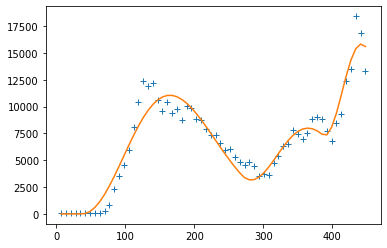

[0.006806472482566672, 3.6193371753218972, 0.09560235792776875, 161415.97717056342, 0.006355641816693493, 33.642964902722674, 0.12566887799763982, 117014.90933640016, 0.0003272889142151503, 348.3876390144603, 0.9027291125931156, 862765.9334296858]
[(0.005382363242044597, 0.007382363242044599), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.006862970512548899), (24.543866850402015, 44.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000215429094809445, 0.00041542909480944505), (250.35283346664193, 400.3528334666419), (0.7538088144894274, 0.9538088144894276), (840923.7965952018, 1040923.7965952018)]
[(0.005382363242044597, 0.007382363242044599), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.006862970512548899), (24.543866850402015,

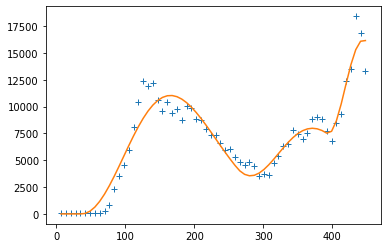

[0.006716183899484473, 3.523015663911716, 0.09499924627779208, 162192.2111107114, 0.005242399771190047, 31.95517180926506, 0.12220828747447798, 129069.94815637072, 0.0002950345177827197, 393.311305602464, 1.0038088144894275, 868957.4793818942]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.006862970512548899), (24.543866850402015, 44.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000215429094809445, 0.00041542909480944505), (250.35283346664193, 400.3528334666419), (0.7538088144894274, 1.5038088144894275), (790923.7965952018, 1040923.7965952018)]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.006862970512548899), (24.543866850402015, 44.5438

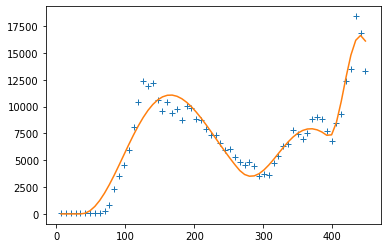

[0.00630080017265772, 3.515222788983229, 0.09744251417256514, 168098.98389552665, 0.005710980016086182, 32.20831443641977, 0.122137951803399, 122503.51707888763, 0.0003823913621680001, 394.5726846335612, 1.0031647064377076, 793144.5039811532]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004862970512548897, 0.006862970512548899), (24.543866850402015, 44.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000215429094809445, 0.00041542909480944505), (250.35283346664193, 400.3528334666419), (0.7538088144894274, 1.5038088144894275), (740923.7965952018, 1040923.7965952018)]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.54386

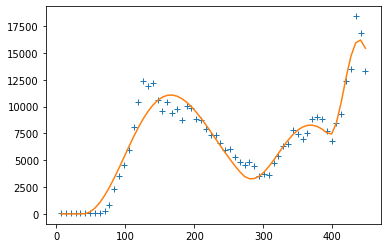

[0.006552678343695709, 3.795769471132345, 0.09735407603364037, 164896.35225820303, 0.005607199600273782, 34.29965926435774, 0.12839560873583142, 129421.82359899071, 0.0004116743256276033, 400.3528334666419, 1.0154537279010116, 740923.7965952018]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000215429094809445, 0.00041542909480944505), (250.35283346664193, 400.3528334666419), (0.7538088144894274, 1.5038088144894275), (740923.7965952018, 1040923.7965952018)]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.54

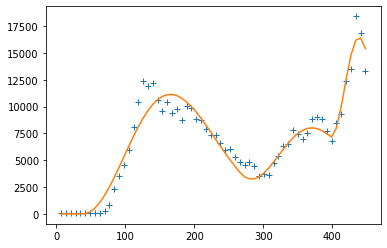

[0.007212338860919279, 3.6251448677294005, 0.09312524426431343, 157954.2376974292, 0.00531680515003566, 34.0451563895554, 0.12798872171086664, 129043.28682364582, 0.00040906818709383083, 436.64608570290847, 1.1005861963065575, 740923.7965952018]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000215429094809445, 0.0004654290948094451), (250.35283346664193, 450.3528334666419), (0.7538088144894274, 1.5038088144894275), (690923.7965952018, 1040923.7965952018)]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.543

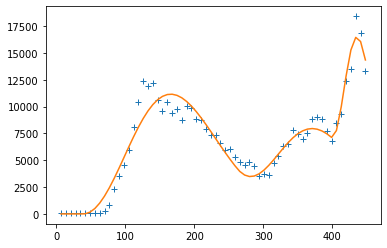

[0.006881108077196111, 3.773319831647978, 0.09538179275258998, 161978.6510972394, 0.0057311265665298886, 30.85909688250994, 0.11787404555612571, 123270.5255556357, 0.00041952592294262057, 496.4303344414805, 1.2446667970903902, 705808.217308976]
Iteração: 1400


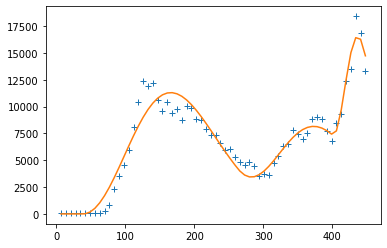

[0.006945963299852042, 3.734251777850799, 0.09480769262290098, 163329.25170512378, 0.005446075290206756, 31.752567750583935, 0.12050687350709038, 129953.86693180806, 0.0004262694833602592, 496.35528635293326, 1.2403656247461137, 690923.7965952018]
Iteração: 1600


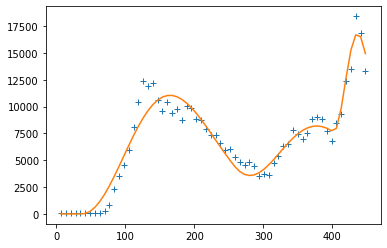

[0.006431442368101418, 3.696820370277206, 0.09807616889567132, 165965.56914832199, 0.005638517893592947, 28.069402668771573, 0.10885457595204046, 128797.02263482905, 0.00044589247981481357, 500.0757030316649, 1.2471469529812285, 648299.0142788065]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.54386685040201), (0.06617232886496757, 0.16617232886496758), (86006.93191278356, 186006.93191278356), (0.000215429094809445, 0.0004654290948094451), (250.35283346664193, 500.3528334666419), (0.7538088144894274, 1.5038088144894275), (640923.7965952018, 1040923.7965952018)]
[(0.005382363242044597, 0.0078823632420446), (2.629455843939362, 4.129455843939362), (0.08785084810639841, 0.10285084810639843), (115108.0288931446, 215108.0288931446), (0.004362970512548896, 0.006862970512548899), (24.543866850402015, 44.5

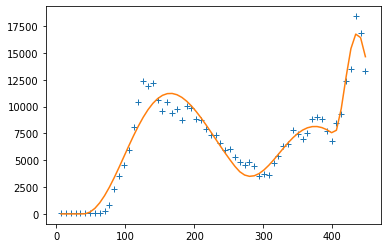

[0.006681756336553092, 3.8390284490442124, 0.0972368097418459, 165495.35304789414, 0.005548607711353539, 29.6444152784099, 0.11406192065727577, 129033.40747436458, 0.0004662446150969958, 497.2809296814481, 1.2403683602823818, 653879.1432137376]
Iteração: 2000


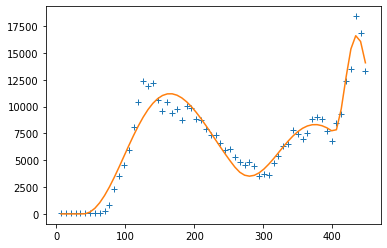

[0.006764577363969954, 3.820379235023704, 0.096953712405807, 164062.04226854778, 0.005575428498562472, 29.132309172459244, 0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 495.9643789712677, 1.2348421276728896, 600799.5717136394]
[0.006764577363969954, 3.820379235023704, 0.096953712405807, 164062.04226854778, 0.005575428498562472, 29.132309172459244, 0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 495.9643789712677, 1.2348421276728896, 600799.5717136394]


<Figure size 432x288 with 0 Axes>

In [26]:
#Adjusting the two waves at the same time with the new model:

x_dados = np.array(srag_deaths_data['semana_epidemiologica'])
y_dados = np.array(srag_deaths_data['casos'])

cost_func = rsme
objective_function_name = 'dist_maxwell_boltzmann'

#Parameters based on the predecessor runs:
wave_1 = [0.006382363242044598, 3.129455843939362, 0.09285084810639842, 165108.0288931446]
wave_2 = [0.005362970512548897, 29.543866850402015, 0.11617232886496758, 136006.93191278356]
wave_3 = [0.00036542909480944503, 300.3528334666419, 0.8038088144894274, 990923.7965952018]

popsize = 120              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.5               #Fator de mutação [0,2]
recombination = 0.4        #Parâmetro de recombinação [0,1]
maxiter = 2000             #Número de gerações
plot_interval = maxiter/10 #plotar a cada...
bound_parameter = 0.5      #1.0*eN +- bound_parameter*eN

bounds = [(wave_1[0]-bound_parameter*10**order_of_magnitude(wave_1[0]),
           wave_1[0]+bound_parameter*10**order_of_magnitude(wave_1[0])),
          (wave_1[1]-bound_parameter*10**order_of_magnitude(wave_1[1]),
           wave_1[1]+bound_parameter*10**order_of_magnitude(wave_1[1])), 
          (wave_1[2]-bound_parameter*10**order_of_magnitude(wave_1[2]),
           wave_1[2]+bound_parameter*10**order_of_magnitude(wave_1[2])),
          (wave_1[3]-bound_parameter*10**order_of_magnitude(wave_1[3]),
           wave_1[3]+bound_parameter*10**order_of_magnitude(wave_1[3])), 
          (wave_2[0]-bound_parameter*10**order_of_magnitude(wave_2[0]),
           wave_2[0]+bound_parameter*10**order_of_magnitude(wave_2[0])),
          (wave_2[1]-bound_parameter*10**order_of_magnitude(wave_2[1]),
           wave_2[1]+bound_parameter*10**order_of_magnitude(wave_2[1])), 
          (wave_2[2]-bound_parameter*10**order_of_magnitude(wave_2[2]),
           wave_2[2]+bound_parameter*10**order_of_magnitude(wave_2[2])),
          (wave_2[3]-bound_parameter*10**order_of_magnitude(wave_2[3]),
           wave_2[3]+bound_parameter*10**order_of_magnitude(wave_2[3])),
          (wave_3[0]-bound_parameter*10**order_of_magnitude(wave_3[0]),
           wave_3[0]+bound_parameter*10**order_of_magnitude(wave_3[0])),
          (wave_3[1]-bound_parameter*10**order_of_magnitude(wave_3[1]),
           wave_3[1]+bound_parameter*10**order_of_magnitude(wave_3[1])), 
          (wave_3[2]-bound_parameter*10**order_of_magnitude(wave_3[2]),
           wave_3[2]+bound_parameter*10**order_of_magnitude(wave_3[2])),
          (wave_3[3]-bound_parameter*10**order_of_magnitude(wave_3[3]),
           wave_3[3]+bound_parameter*10**order_of_magnitude(wave_3[3]))]

for i in range(1):
    list_tmp = Differential_Evolution(cost_func, bounds, bound_parameter, popsize, 
                                      mutate, recombination, maxiter, x_dados, y_dados, 
                                      plot_interval)
    print(list_tmp)


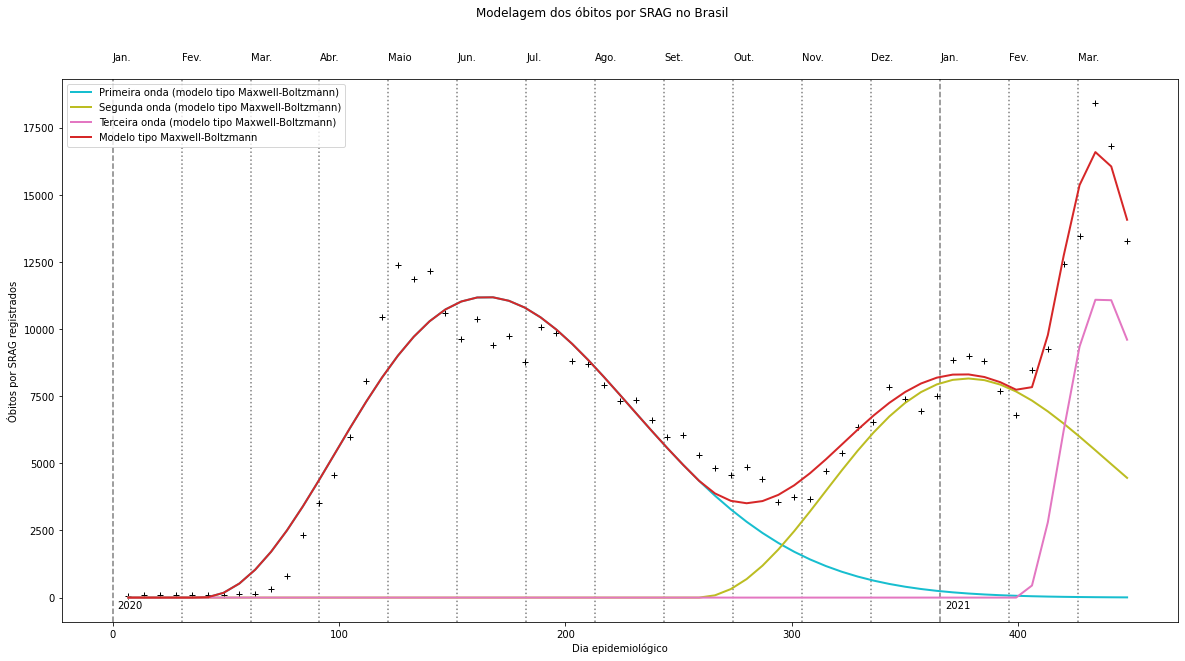

In [32]:
#Plot the fitting and forecast of the models:

max_bol_parameters = [0.006764577363969954, 3.820379235023704, 0.096953712405807, 
                      164062.04226854778, 0.005575428498562472, 29.132309172459244, 
                      0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 
                      495.9643789712677, 1.2348421276728896, 600799.5717136394]

plt.figure(figsize=(20,10))
plt.ylabel('Óbitos por SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por SRAG no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(len(srag_deaths_data['semana_epidemiologica'])):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = 0
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias)*7:
    if initial_day >= 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 20000, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -400, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 20000, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(srag_deaths_data['semana_epidemiologica'], srag_deaths_data['casos'], 'k+')

#New model:

plt.plot(srag_deaths_data['semana_epidemiologica'],
         single_maxwell_boltzmann(srag_deaths_data['semana_epidemiologica'],
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(srag_deaths_data['semana_epidemiologica'],
         single_maxwell_boltzmann(srag_deaths_data['semana_epidemiologica'],
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(srag_deaths_data['semana_epidemiologica'],
         single_maxwell_boltzmann(srag_deaths_data['semana_epidemiologica'],
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(srag_deaths_data['semana_epidemiologica'],
         dist_maxwell_boltzmann(srag_deaths_data['semana_epidemiologica'], max_bol_parameters), 
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=2)

plt.show()


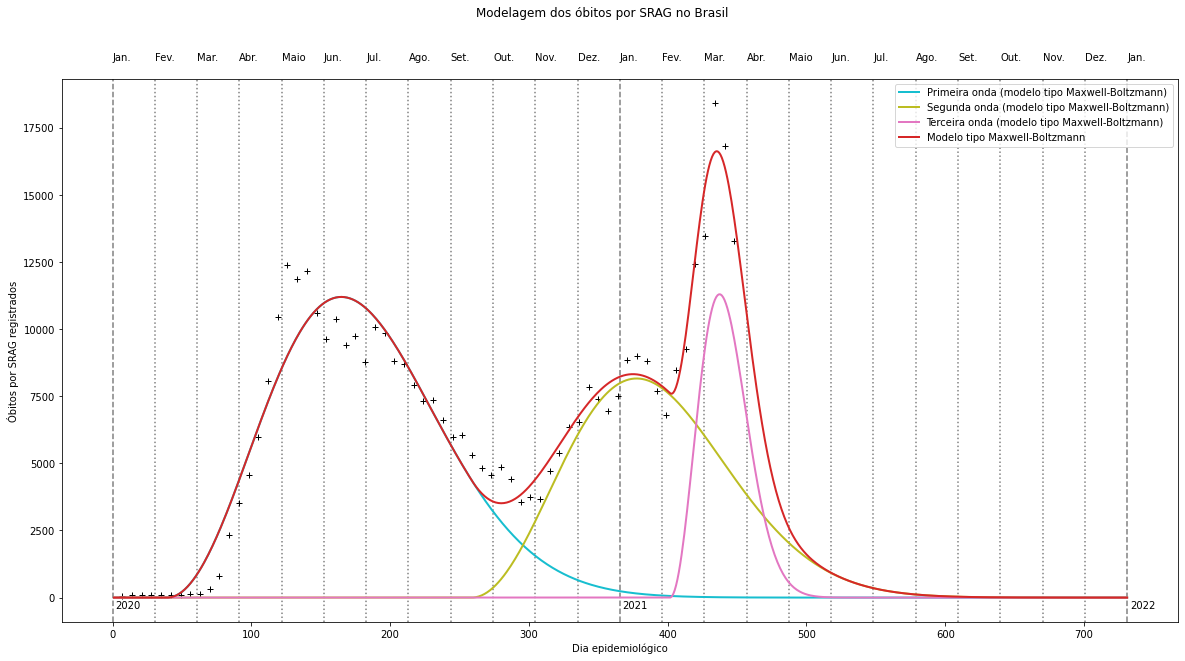

In [33]:
#Plot the fitting and forecast of the models:

plt.figure(figsize=(20,10))
plt.ylabel('Óbitos por SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por SRAG no Brasil')

future_dias=[]
dia_inicial=1.
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = 0
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day >= 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 20000, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -400, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 20000, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

plt.plot(srag_deaths_data['semana_epidemiologica'], srag_deaths_data['casos'], 'k+')

#New model:

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[0], 
                                 max_bol_parameters[1],  
                                 max_bol_parameters[2], 
                                 max_bol_parameters[3]]),
          'tab:cyan', linewidth=2., label='Primeira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[4], 
                                 max_bol_parameters[5],  
                                 max_bol_parameters[6], 
                                 max_bol_parameters[7]]),
          'tab:olive', linewidth=2., label='Segunda onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         single_maxwell_boltzmann(future_dias,
                                [max_bol_parameters[8], 
                                 max_bol_parameters[9],  
                                 max_bol_parameters[10], 
                                 max_bol_parameters[11]]),
          'tab:pink', linewidth=2., label='Terceira onda (modelo tipo Maxwell-Boltzmann)')

plt.plot(future_dias,
         dist_maxwell_boltzmann(future_dias, max_bol_parameters),
         'tab:red', linewidth=2., label='Modelo tipo Maxwell-Boltzmann')

plt.legend(loc=1)

plt.show()


NORMALIZATED MEAN CURVE:

In [34]:
#Obtaining the maximum of the curves

future_dias=[]
dia_inicial=1.
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

#COVID-19 cases:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006759756378828882, 4.302082937289346, 0.10824243269510325, 
                      613201.7188420717, 0.0008873216687346295, 58.69975370422634, 
                      0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 
                      182.24660561441203, 0.534960809047034, 1802457.1288457094])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max covid19_cases: ', tmp_max, '; Max covid19_cases index: ', tmp_index)

#COVID-19 deaths:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 
                      16962.8276657402, 0.0003335679123366098, 55.17525093886882, 
                      0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 
                      236.00612240496054, 0.656007574245604, 61122.13420083932])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max covid19_deaths: ', tmp_max, '; Max covid19_deaths index: ', tmp_index)

#SRAG cases:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.025848989091852237, 1.398677128715782, 0.0428443160147331, 
                      278266.1881074972, 0.0005334603790478621, 69.83920941952303, 
                      0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 
                      219.33584482690588, 0.549217898973079, 1107011.7268371938])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max srag_cases: ', tmp_max, '; Max srag_cases index: ', tmp_index)

#SRAG deaths:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006764577363969954, 3.820379235023704, 0.096953712405807, 
                      164062.04226854778, 0.005575428498562472, 29.132309172459244, 
                      0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 
                      495.9643789712677, 1.2348421276728896, 600799.5717136394])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max srag_deaths: ', tmp_max, '; Max srag_deaths index: ', tmp_index)


Max covid19_cases:  72673.73688790933 ; Max covid19_cases index:  393
Max covid19_deaths:  2883.9122011987847 ; Max covid19_deaths index:  407
Max srag_cases:  61310.89013432397 ; Max srag_cases index:  442
Max srag_deaths:  16630.487349853414 ; Max srag_deaths index:  434


In [35]:
#Calculate the maximuns of the second wave:

future_dias=[]
dia_inicial=300.
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

#COVID-19 cases:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006759756378828882, 4.302082937289346, 0.10824243269510325, 
                      613201.7188420717, 0.0008873216687346295, 58.69975370422634, 
                      0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 
                      182.24660561441203, 0.534960809047034, 1802457.1288457094])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max covid19_cases on the second wave: ', tmp_max, '; Max covid19_cases index: ', tmp_index+300+59)

#COVID-19 deaths:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 
                      16962.8276657402, 0.0003335679123366098, 55.17525093886882, 
                      0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 
                      236.00612240496054, 0.656007574245604, 61122.13420083932])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max covid19_deaths on the second wave: ', tmp_max, '; Max covid19_deaths index: ', tmp_index+300+59)

#SRAG cases:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.025848989091852237, 1.398677128715782, 0.0428443160147331, 
                      278266.1881074972, 0.0005334603790478621, 69.83920941952303, 
                      0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 
                      219.33584482690588, 0.549217898973079, 1107011.7268371938])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max srag_cases on the second wave: ', tmp_max, '; Max srag_cases index: ', tmp_index+300)

#SRAG deaths:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006764577363969954, 3.820379235023704, 0.096953712405807, 
                      164062.04226854778, 0.005575428498562472, 29.132309172459244, 
                      0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 
                      495.9643789712677, 1.2348421276728896, 600799.5717136394])
tmp_max = max(tmp_list)
for i in range(len(tmp_list)): 
    if tmp_list[i]==tmp_max: tmp_index = i
print('Max srag_deaths on the second wave: ', tmp_max, '; Max srag_deaths index: ', tmp_index+300)


Max covid19_cases on the second wave:  72673.73688790933 ; Max covid19_cases index:  453
Max covid19_deaths on the second wave:  2883.9122011987847 ; Max covid19_deaths index:  467
Max srag_cases on the second wave:  61310.89013432397 ; Max srag_cases index:  443
Max srag_deaths on the second wave:  16630.487349853414 ; Max srag_deaths index:  435


In [36]:
(453+467+443+435)/4

449.5

In [37]:
#Calculate the end of the pandemic:

future_dias=[]
dia_inicial=300.
for i in range(2000):
    future_dias.append(dia_inicial)
    dia_inicial+=1

#COVID-19 cases:
tmp_index=-1000
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006759756378828882, 4.302082937289346, 0.10824243269510325, 
                      613201.7188420717, 0.0008873216687346295, 58.69975370422634, 
                      0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 
                      182.24660561441203, 0.534960809047034, 1802457.1288457094])
for i in range(len(tmp_list)): 
    if tmp_list[i]<1: tmp_index = i; break
print('Fim dos casos de covid: ', tmp_index+300+59)

#COVID-19 deaths:
tmp_index=-1000
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 
                      16962.8276657402, 0.0003335679123366098, 55.17525093886882, 
                      0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 
                      236.00612240496054, 0.656007574245604, 61122.13420083932])
for i in range(len(tmp_list)): 
    if tmp_list[i]<1: tmp_index = i; break
print('Fim dos casos de morte por covid: ', tmp_index+300+59)

#SRAG cases:
tmp_index=-1000
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.025848989091852237, 1.398677128715782, 0.0428443160147331, 
                      278266.1881074972, 0.0005334603790478621, 69.83920941952303, 
                      0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 
                      219.33584482690588, 0.549217898973079, 1107011.7268371938])
for i in range(len(tmp_list)): 
    if tmp_list[i]<1: tmp_index = i; break
print('Fim dos casos de SRAG: ', tmp_index+300)

#SRAG deaths:
tmp_index=-1000
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006764577363969954, 3.820379235023704, 0.096953712405807, 
                      164062.04226854778, 0.005575428498562472, 29.132309172459244, 
                      0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 
                      495.9643789712677, 1.2348421276728896, 600799.5717136394])
for i in range(len(tmp_list)): 
    if tmp_list[i]<1: tmp_index = i; break
print('Fim dos casos de morte por SRAG: ', tmp_index+300)


Fim dos casos de covid:  729
Fim dos casos de morte por covid:  924
Fim dos casos de SRAG:  807
Fim dos casos de morte por SRAG:  680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: overflow encountered in exp


In [38]:
(729+924+807+680)/4

785.0

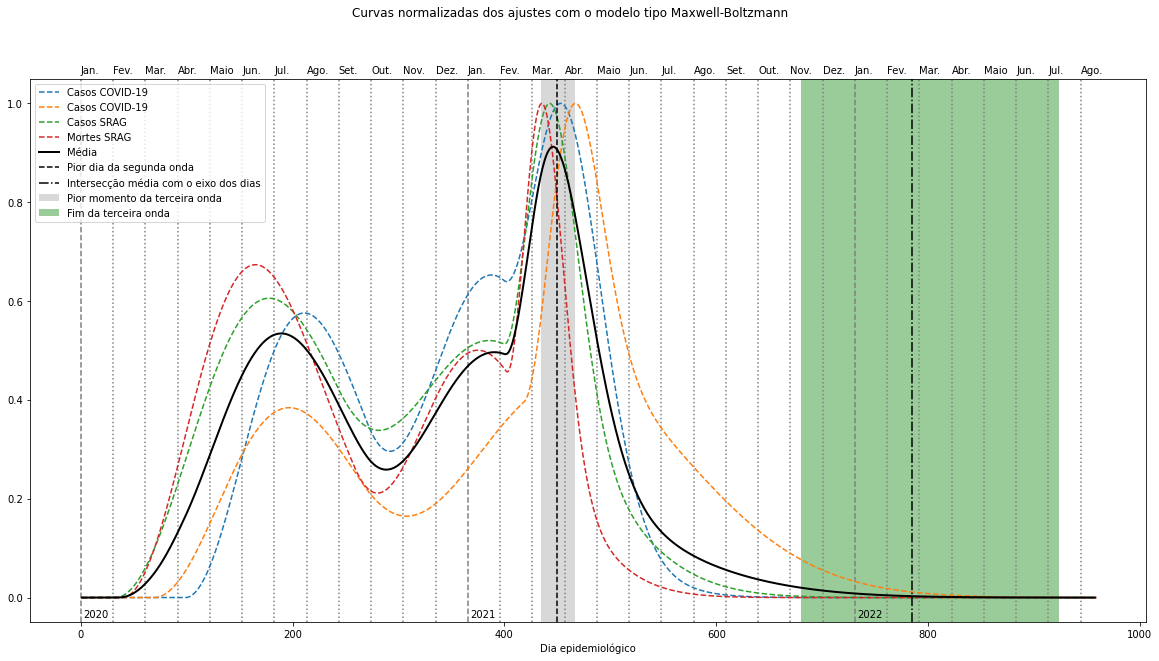

In [46]:
#Ploting the normalized curve

plt.figure(figsize=(20,10))

plt.xlabel('Dia epidemiológico')
plt.suptitle('Curvas normalizadas dos ajustes com o modelo tipo Maxwell-Boltzmann')

future_dias=[]
dia_inicial=1.
for i in range(958):
    future_dias.append(dia_inicial)
    dia_inicial+=1

initial_day = 0
month_tmp = 0
year_tmp = '202'
cont = 0
months = ['Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.', 'Jan.', 'Fev.', 'Mar.', 'Abr.', 
          'Maio', 'Jun.', 'Jul.', 'Ago.', 'Set.', 'Out.', 'Nov.', 'Dez.',
          'Jan.', 'Fev.', 'Mar.', 'Abr.', 'Maio', 'Jun.', 'Jul.', 'Ago.',
          'Set.', 'Out.', 'Nov.', 'Dez.']
while initial_day < len(future_dias):
    if initial_day >= 0:
        if months[int(month_tmp)]=='Jan.':
            plt.text(initial_day, 1.06, months[int(month_tmp)], rotation=0)
            plt.text(initial_day+2, -0.04, year_tmp+str(cont), rotation=0)
            plt.axvline(initial_day, color="grey", linestyle="--")
            cont+=1
        else:
            plt.text(initial_day, 1.06, months[int(month_tmp)], rotation=0)
            plt.axvline(initial_day, color="grey", linestyle=":")
    initial_day+=30.4583333
    month_tmp+=1.

tmp_list = dist_maxwell_boltzmann(future_dias,   
                                [0.006759756378828882, 4.302082937289346, 0.10824243269510325, 
                      613201.7188420717, 0.0008873216687346295, 58.69975370422634, 
                      0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 
                      182.24660561441203, 0.534960809047034, 1802457.1288457094])
tmp_list_1=[]
for i in range(len(future_dias)): 
    if i >= 59: tmp_list_1.append(tmp_list[i-59])
    else: tmp_list_1.append(0)
for i in range(len(tmp_list_1)): tmp_list_1[i]=tmp_list_1[i]/72673.73688790933
plt.plot(future_dias, tmp_list_1, '--', label='Casos COVID-19')

tmp_list = dist_maxwell_boltzmann(future_dias,   
                                [0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 
                      16962.8276657402, 0.0003335679123366098, 55.17525093886882, 
                      0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 
                      236.00612240496054, 0.656007574245604, 61122.13420083932])
tmp_list_2=[]
for i in range(len(future_dias)): 
    if i >= 59: tmp_list_2.append(tmp_list[i-59])
    else: tmp_list_2.append(0)
for i in range(len(tmp_list_2)): tmp_list_2[i]=tmp_list_2[i]/2883.9122011987847
plt.plot(future_dias, tmp_list_2, '--', label='Casos COVID-19')

tmp_list_3 = dist_maxwell_boltzmann(future_dias,
                                [0.025848989091852237, 1.398677128715782, 0.0428443160147331, 
                      278266.1881074972, 0.0005334603790478621, 69.83920941952303, 
                      0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 
                      219.33584482690588, 0.549217898973079, 1107011.7268371938])
for i in range(len(tmp_list_3)): tmp_list_3[i]=tmp_list_3[i]/61310.89013432397
plt.plot(future_dias, tmp_list_3, '--', label='Casos SRAG')

tmp_list_4 = dist_maxwell_boltzmann(future_dias,
                                [0.006764577363969954, 3.820379235023704, 0.096953712405807, 
                      164062.04226854778, 0.005575428498562472, 29.132309172459244, 
                      0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 
                      495.9643789712677, 1.2348421276728896, 600799.5717136394])
for i in range(len(tmp_list_4)): tmp_list_4[i]=tmp_list_4[i]/16630.487349853414
plt.plot(future_dias, tmp_list_4, '--', label='Mortes SRAG')

tmp_list = []
for i in range(len(future_dias)): tmp_list.append((tmp_list_1[i]+tmp_list_2[i]+tmp_list_3[i]+tmp_list_4[i])/4.)
plt.plot(future_dias, tmp_list, color='k', label='Média', linewidth=2.)

plt.axvline((453+467+443+435)/4., color='k', linestyle='--', label='Pior dia da segunda onda')
plt.axvspan(435, 467, facecolor='0.7', alpha=0.5, label='Pior momento da terceira onda')

plt.axvline((729+924+807+680)/4., color='k', linestyle='dashdot', label='Intersecção média com o eixo dos dias')
plt.axvspan(680, 924, facecolor='g', alpha=0.4, label='Fim da terceira onda')

plt.legend(loc=2)

plt.show()


In [47]:
#Calculating the sum of the fitted curves:

#Obtaining the maximum of the curves

future_dias=[]
dia_inicial=1.
for i in range(1000):
    future_dias.append(dia_inicial)
    dia_inicial+=1

#COVID-19 cases:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006759756378828882, 4.302082937289346, 0.10824243269510325, 
                      613201.7188420717, 0.0008873216687346295, 58.69975370422634, 
                      0.2780915111251909, 1879993.5800628765, 0.0009121606281099963, 
                      182.24660561441203, 0.534960809047034, 1802457.1288457094])
cases_sum = 0.
for i in range(len(tmp_list)-59): cases_sum+=tmp_list[i]
print('COVID-19 total cases: ', cases_sum)

#COVID-19 deaths:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006192697303665649, 0.9921758667543075, 0.09939638232771333, 
                      16962.8276657402, 0.0003335679123366098, 55.17525093886882, 
                      0.26920683812699975, 84516.3072283602, 0.0009949350769621554, 
                      236.00612240496054, 0.656007574245604, 61122.13420083932])
deaths_sum = 0.
for i in range(len(tmp_list)-59): deaths_sum+=tmp_list[i]
print('COVID-19 total deaths: ', deaths_sum)

#SRAG cases:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.025848989091852237, 1.398677128715782, 0.0428443160147331, 
                      278266.1881074972, 0.0005334603790478621, 69.83920941952303, 
                      0.2872802782031718, 1588545.051486529, 0.0015505325886128866, 
                      219.33584482690588, 0.549217898973079, 1107011.7268371938])
srag_cases_sum = 0.
for i in range(len(tmp_list)): 
    srag_cases_sum+=tmp_list[i]
print('SRAG total cases: ', srag_cases_sum/7.)

#SRAG deaths:
tmp_list = dist_maxwell_boltzmann(future_dias,
                                [0.006764577363969954, 3.820379235023704, 0.096953712405807, 
                      164062.04226854778, 0.005575428498562472, 29.132309172459244, 
                      0.11261731165743843, 131690.41559216945, 0.0005135349269826195, 
                      495.9643789712677, 1.2348421276728896, 600799.5717136394])
srag_deaths_sum = 0.
for i in range(len(tmp_list)): 
    srag_deaths_sum+=tmp_list[i]
print('SRAG total deaths: ', srag_deaths_sum/7.)

#Cases subnotification:
print('COVID-19 cases subnotification: ', 100-(100*cases_sum)/(srag_cases_sum/7.))

#Deaths subnotification
print('COVID-19 deaths subnotification: ', 100-(100*deaths_sum)/(srag_deaths_sum/7.))


COVID-19 total cases:  15794743.621023268
COVID-19 total deaths:  577774.2170571042
SRAG total cases:  2005719.564589742
SRAG total deaths:  478295.73698288307
COVID-19 cases subnotification:  -687.4851449760869
COVID-19 deaths subnotification:  -20.79852952521324
